In [1]:
#---------------------------------------------------------------------------
#----------------------------SVM--------------------------------------------
#---------------------------------------------------------------------------

In [2]:
# !pip install tensorflow

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import random
import time
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras import layers, models, callbacks
import librosa
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.svm import SVC, SVR


In [4]:
#TRAIN SET
#datasets

# df=pd.read_csv(r"D:\ML\Trials\MFCC+ALL\train_features(mfcc(39)+rest=all).csv")
# df1=pd.read_csv(r"D:\ML\Trials\MFCC+ALL\test_features(mfcc(39)+rest=all).csv")

# df=pd.read_csv(r"D:\ML\Trials\MFCC+chroma\train_features(mfcc(39)+chroma).csv")
# df1=pd.read_csv(r"D:\ML\Trials\MFCC+chroma\test_features(mfcc(39)+chroma).csv")

# df=pd.read_csv(r"D:\ML\Trials\MFCC+formant\train_features(mfcc(39)+formant).csv")
# df1=pd.read_csv(r"D:\ML\Trials\MFCC+formant\test_features(mfcc(39)+formant).csv")


# df=pd.read_csv(r"D:\ML\Trials\MFCC+log energy\train_features(mfcc(39)+log energy).csv")
# df1=pd.read_csv(r"D:\ML\Trials\MFCC+log energy\test_features(mfcc(39)+log energy).csv")


# df=pd.read_csv(r"D:\ML\Trials\MFCC+pitch\train_features(mfcc(39)+pitch).csv")
# df1=pd.read_csv(r"D:\ML\Trials\MFCC+pitch\test_features(mfcc(39)+pitch).csv")


# df=pd.read_csv(r"D:\ML\Trials\MFCC+remaining\train_features(mfcc(39)+remaining).csv")
# df1=pd.read_csv(r"D:\ML\Trials\MFCC+remaining\test_features(mfcc(39)+remaining).csv")


# df=pd.read_csv(r"D:\ML\Trials\MFCC+spectral+zcr+rms\train_features(mfcc(39)+spectral+rms+zcr).csv")
# df1=pd.read_csv(r"D:\ML\Trials\MFCC+spectral+zcr+rms\test_features(mfcc(39)+spectral+rms+zcr).csv")


# df=pd.read_csv(r"D:\ML\Trials\MFCC+tonnetz\train_features(mfcc(39)+tonnetz).csv")
# df1=pd.read_csv(r"D:\ML\Trials\MFCC+tonnetz\test_features(mfcc(39)+tonnetz).csv")


# df=pd.read_csv(r"D:\ML\Trials\MFCC(39)\train_features(mfcc(39)).csv")
# df1=pd.read_csv(r"D:\ML\Trials\MFCC(39)\test_features(mfcc(39)).csv")

# df=df.drop(['File Name'],axis=1)
# df1=df1.drop(['File Name'],axis=1)


# features_train = df.iloc[:, :-1].values
# X_t = np.array(features_train)
# y_t = np.array(df['Age'])

# X_train, X_Val, y_train, y_Val = train_test_split(X_t,y_t, test_size = 0.2, random_state = 0)

# features_test = df1.iloc[:, :-1].values
# X_test = np.array(features_test)
# y_test = np.array(df1['Age'])

# X_train = np.array(X_train) 
# y_train = np.array(y_train)

# X_Val = np.array(X_Val) 
# y_Val = np.array(y_Val)

# X_test = np.array(X_test)
# y_test = np.array(y_test)

# print("Shape of X_train:", X_train.shape)
# print("Shape of y_train:", y_train.shape)
# print()
# print("Shape of X_Val:", X_Val.shape)
# print("Shape of y_Val:", y_Val.shape)
# print()
# print("Shape of X_test:", X_test.shape)
# print("Shape of y_test:", y_test.shape)
# print()

# y_train_c = to_categorical(y_train, num_classes=15)
# y_Val_c = to_categorical(y_Val, num_classes=15)
# y_test_c = to_categorical(y_test, num_classes=15)

# print("Shape of y_train:", y_train_c.shape)
# print("Shape of y_Val:", y_Val_c.shape)
# print("Shape of y_test:", y_test_c.shape)


# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()

# X_train = ss.fit_transform(X_train)
# X_Val = ss.transform(X_Val)
# X_test= ss.transform(X_test)

In [5]:
#TRAIN SET
#datasets

# df=pd.read_csv(r"D:\ML\Dataset Metadata\PF STAR Merged\features(All).csv")
# df=pd.read_csv(r"D:\ML\Dataset Metadata\PF STAR Merged\features(MFCC).csv")
# df=pd.read_csv(r"D:\ML\Dataset Metadata\PF STAR Merged\features(MFCC+Chroma).csv")
# df=pd.read_csv(r"D:\ML\Dataset Metadata\PF STAR Merged\features(MFCC+Formant).csv")
# df=pd.read_csv(r"D:\ML\Dataset Metadata\PF STAR Merged\features(MFCC+Tonnetz).csv")
# df=pd.read_csv(r"D:\ML\Dataset Metadata\PF STAR Merged\features(MFCC+Spectral+ZCR+RMS).csv")
# df=pd.read_csv(r"D:\ML\Dataset Metadata\PF STAR Merged\features(MFCC+Log Energy).csv")
# df=pd.read_csv(r"D:\ML\Dataset Metadata\PF STAR Merged\features(MFCC+Pitch).csv")
# df=pd.read_csv(r"D:\ML\Dataset Metadata\PF STAR Merged\features(MFCC+Remaining).csv")
df=pd.read_csv(r"D:\ML\Dataset Metadata\PF STAR Merged\features(MFCC+Chroma+Spectral+ZCR+RMS).csv")


df=df.drop(['File Name'],axis=1)
df.shape


features_train = df.iloc[:, :-1].values
X = np.array(features_train)
y = np.array(df['Age'])

X_t, X_Val, y_t, y_Val = train_test_split(X,y, test_size = 0.2, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X_t,y_t, test_size = 0.25, random_state = 42)

X_train = np.array(X_train) 
y_train = np.array(y_train)

X_Val = np.array(X_Val) 
y_Val = np.array(y_Val)

X_test = np.array(X_test)
y_test = np.array(y_test)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print()
print("Shape of X_Val:", X_Val.shape)
print("Shape of y_Val:", y_Val.shape)
print()
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)
print()

y_train_c = to_categorical(y_train, num_classes=15)
y_Val_c = to_categorical(y_Val, num_classes=15)
y_test_c = to_categorical(y_test, num_classes=15)

print("Shape of y_train:", y_train_c.shape)
print("Shape of y_Val:", y_Val_c.shape)
print("Shape of y_test:", y_test_c.shape)


from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_Val = ss.transform(X_Val)
X_test= ss.transform(X_test)


print(np.unique(y))
print(np.unique(y_train))
print(np.unique(y_test))
print(np.unique(y_Val))



Shape of X_train: (654, 66)
Shape of y_train: (654,)

Shape of X_Val: (219, 66)
Shape of y_Val: (219,)

Shape of X_test: (218, 66)
Shape of y_test: (218,)

Shape of y_train: (654, 15)
Shape of y_Val: (219, 15)
Shape of y_test: (218, 15)
[ 4  5  6  7  8  9 10 11 12 13 14]
[ 4  5  6  7  8  9 10 11 12 13 14]
[ 4  6  7  8  9 10 11 12 13 14]
[ 5  6  7  8  9 10 11 12 13 14]


In [6]:
# from sklearn.preprocessing import StandardScaler
# scale = StandardScaler()

# features_train_s = df.iloc[:, :-1].values
# X_tr = np.array(features_train_s)
# y_tr = np.array(df['Age'])

# features_test_s = df1.iloc[:, :-1].values
# X_te = np.array(features_test_s)
# y_te = np.array(df1['Age'])

# X_selected = scale.fit_transform(X_tr)
# X_te= scale.transform(X_te)

# print(X_selected.shape)
#------------------------------------------------------------------------------------
features_train = df.iloc[:, :-1].values
X_s = np.array(features_train)
y_s = np.array(df['Age'])

X_tr, X_te, y_tr, y_te = train_test_split(X_s,y_s, test_size = 0.4, random_state = 42)
from sklearn.preprocessing import StandardScaler
s = StandardScaler()

X_tr = s.fit_transform(X_tr)
X_te = s.transform(X_te)

print("Shape of X_train:", X_tr.shape)
print("Shape of y_train:", y_tr.shape)
print()
print("Shape of X_test:", X_te.shape)
print("Shape of y_test:", y_te.shape)

svm_classifier_rbf = SVC(kernel='rbf', C=1.0)
svm_classifier_rbf.fit(X_tr,y_tr)

y_pred_rbf = svm_classifier_rbf.predict(X_te)
accuracy_rbf = accuracy_score(y_te,y_pred_rbf)
print("SVM(rbf) Accuracy:", f"{accuracy_rbf * 100:.2f}%")


Shape of X_train: (654, 66)
Shape of y_train: (654,)

Shape of X_test: (437, 66)
Shape of y_test: (437,)
SVM(rbf) Accuracy: 81.24%


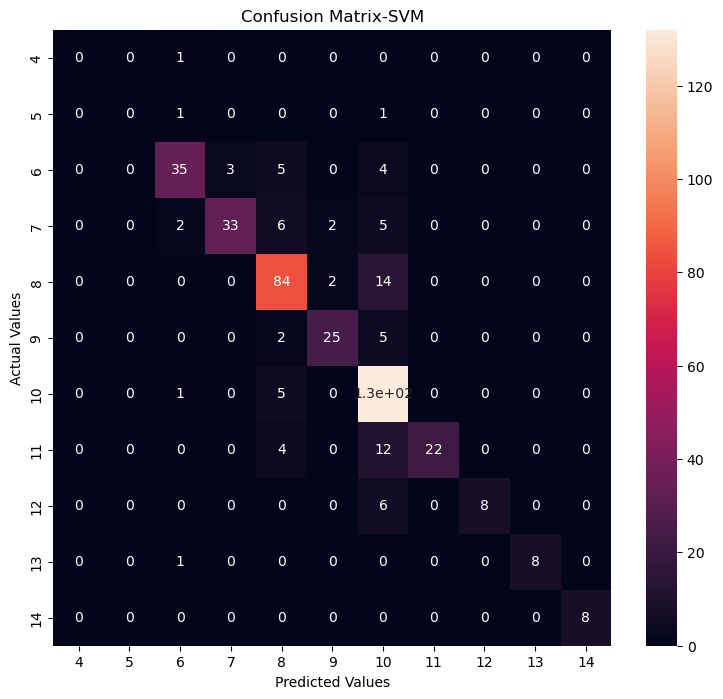

C:\Users\visha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM(rbf) Accuracy: 81.24%
Precision: 0.83
Recall: 0.81
F1 Score: 0.81



In [7]:
#### ONLY CONFUSION MATRIX PLOT - CORRECT

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

cm_svm = confusion_matrix(y_te, y_pred_rbf)
unique_values_svm = np.unique(np.concatenate((y_te, y_pred_rbf)))

cm_df_svm = pd.DataFrame(cm_svm, index=unique_values_svm, columns=unique_values_svm)

plt.figure(figsize=(9, 8))
sns.heatmap(cm_df_svm, annot=True)
plt.title('Confusion Matrix-SVM')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()


accuracy_S = accuracy_score(y_te, y_pred_rbf)
precision_S = precision_score(y_te, y_pred_rbf, average='weighted')
recall_S = recall_score(y_te, y_pred_rbf, average='weighted')
f1_S = f1_score(y_te, y_pred_rbf, average='weighted')
conf_matrix_S = confusion_matrix(y_te, y_pred_rbf)
print("SVM(rbf) Accuracy:", f"{accuracy_rbf * 100:.2f}%")

print(f'Precision: {precision_S:.2f}')
print(f'Recall: {recall_S:.2f}')
print(f'F1 Score: {f1_S:.2f}')
# print('Confusion Matrix:')
# print(conf_matrix_S)
print()


In [8]:
#--------------------ANN-----------------------------------

In [9]:
X_train_ann = X_train
X_test_ann = X_test

y_train_ann = y_train_c
y_test_ann = y_test_c

print("Shape of y_train:", y_train_ann.shape)
print("Shape of y_test:", y_test_ann.shape)

Shape of y_train: (654, 15)
Shape of y_test: (218, 15)


In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.callbacks import EarlyStopping

model_ann = Sequential()
model_ann.add(Dense(32, input_shape=(X_train_ann.shape[1],), activation = 'relu'))
model_ann.add(Dropout(0.1))
model_ann.add(Dense(64, activation = 'relu'))
model_ann.add(Dropout(0.25))
model_ann.add(Dense(128, activation = 'relu'))
model_ann.add(Dropout(0.5))
model_ann.add(Dense(15, activation = 'softmax'))

model_ann.summary()

model_ann.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
early_stop_ann = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                2144      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 15)                

Epoch 1/100


21/21 [==============================] - 21s 176ms/step - loss: 2.3798 - accuracy: 0.2049 - val_loss: 2.0224 - val_accuracy: 0.3836
Epoch 2/100
21/21 [==============================] - 1s 25ms/step - loss: 1.9558 - accuracy: 0.3685 - val_loss: 1.8117 - val_accuracy: 0.4110
Epoch 3/100
21/21 [==============================] - 1s 25ms/step - loss: 1.7651 - accuracy: 0.4021 - val_loss: 1.6732 - val_accuracy: 0.4795
Epoch 4/100
21/21 [==============================] - 0s 19ms/step - loss: 1.6481 - accuracy: 0.4495 - val_loss: 1.5528 - val_accuracy: 0.4886
Epoch 5/100
21/21 [==============================] - 0s 22ms/step - loss: 1.5706 - accuracy: 0.4557 - val_loss: 1.4636 - val_accuracy: 0.5205
Epoch 6/100
21/21 [==============================] - 0s 20ms/step - loss: 1.4696 - accuracy: 0.5061 - val_loss: 1.3923 - val_accuracy: 0.5297
Epoch 7/100
21/21 [==============================] - 0s 19ms/step - loss: 1.4034 - accuracy: 0.5092 - val_loss: 1.3312 - val_accuracy: 0.5388
Ep

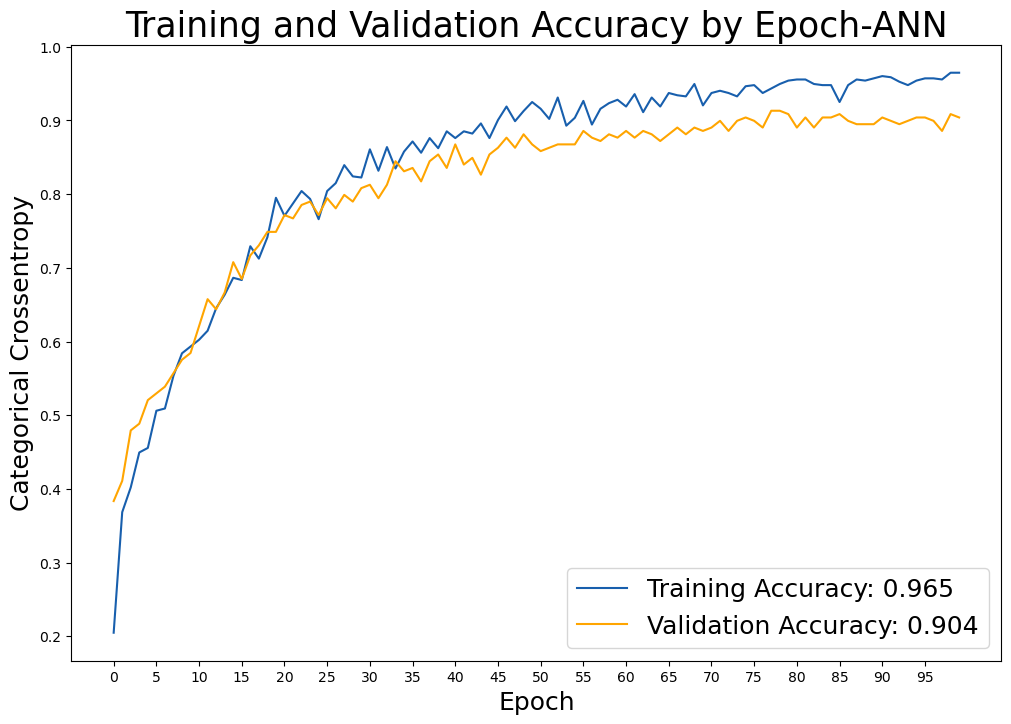

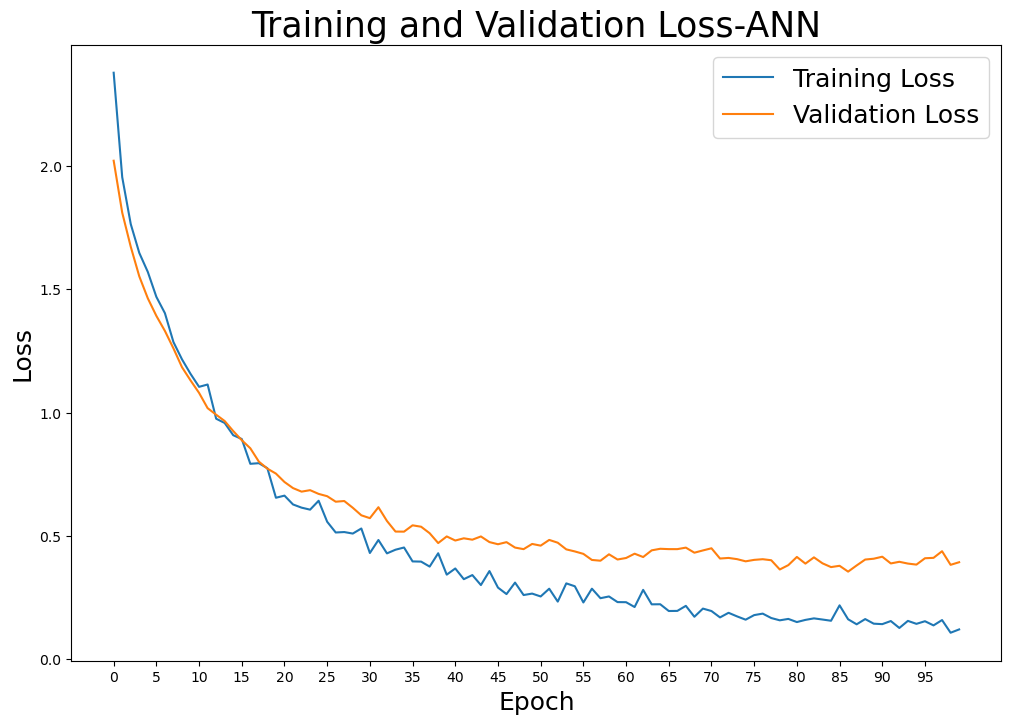

7/7 [==============================] - 5s 23ms/step
Predicted: 6, True: 6
Predicted: 11, True: 11
Predicted: 10, True: 10
Predicted: 9, True: 9
Predicted: 8, True: 8
Predicted: 7, True: 7
Predicted: 7, True: 7
Predicted: 11, True: 11
Predicted: 8, True: 8
Predicted: 10, True: 10
Predicted: 10, True: 10
Predicted: 6, True: 6
Predicted: 11, True: 11
Predicted: 7, True: 7
Predicted: 10, True: 10
Predicted: 10, True: 10
Predicted: 7, True: 7
Predicted: 10, True: 10
Predicted: 10, True: 10
Predicted: 8, True: 11
Predicted: 8, True: 8
Predicted: 14, True: 14
Predicted: 8, True: 8
Predicted: 9, True: 9
Predicted: 7, True: 7
Predicted: 8, True: 8
Predicted: 9, True: 9
Predicted: 10, True: 10
Predicted: 8, True: 8
Predicted: 6, True: 6
Predicted: 8, True: 10
Predicted: 10, True: 11
Predicted: 10, True: 10
Predicted: 10, True: 10
Predicted: 6, True: 6
Predicted: 6, True: 6
Predicted: 10, True: 10
Predicted: 14, True: 14
Predicted: 10, True: 10
Predicted: 9, True: 9
Predicted: 9, True: 9
Predicte

C:\Users\visha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\visha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\visha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


7/7 [==============================] - 1s 24ms/step - loss: 0.3185 - accuracy: 0.9174
Test accuracy: 0.9174311757087708


In [11]:
history_ann = model_ann.fit(X_train_ann, y_train_ann, batch_size=32, epochs=100, 
                    validation_data=(X_Val, y_Val_c),
                    callbacks=[early_stop_ann],verbose=1)

train_accuracy_ann = history_ann.history['accuracy']
val_accuracy_ann = history_ann.history['val_accuracy']

plt.figure(figsize=(12, 8))

plt.plot(train_accuracy_ann, label=f'Training Accuracy: {train_accuracy_ann[-1]:.3f}', color='#185fad')
plt.plot(val_accuracy_ann, label=f'Validation Accuracy: {val_accuracy_ann[-1]:.3f}', color='orange')

plt.title('Training and Validation Accuracy by Epoch-ANN', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Categorical Crossentropy', fontsize=18)
plt.xticks(range(0, 100, 5), range(0, 100, 5))
plt.legend(fontsize=18);

plt.show()

plt.figure(figsize=(12, 8))

plt.plot(history_ann.history['loss'], label='Training Loss')
plt.plot(history_ann.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss-ANN', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.xticks(range(0, 100, 5), range(0, 100, 5))
plt.legend(fontsize=18)

plt.show()


from sklearn.metrics import classification_report

y_predict_ann = np.argmax(model_ann.predict(X_test_ann), axis=-1)
true_ann = np.argmax(to_categorical(y_test_ann[:]), axis = 1)[:,1]

for i,j in zip(y_predict_ann, true_ann):
    print("Predicted: {}, True: {}".format(i, j))

print(classification_report(true_ann, y_predict_ann))


test_loss_ann, test_acc_ann = model_ann.evaluate(X_test_ann, y_test_ann)
print(f'Test accuracy: {test_acc_ann}')


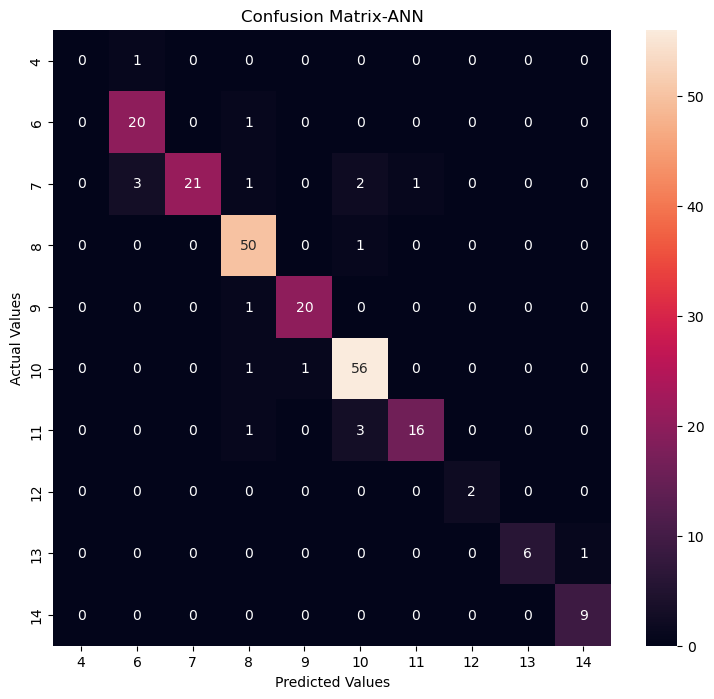

Accuracy: 91.74%
Precision: 0.92
Recall: 0.92
F1 Score: 0.91



C:\Users\visha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


# CONFUSION MATRIX

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# unique_values = pd.Series(y_train).unique()

cm = confusion_matrix(true_ann, y_predict_ann)
unique_values = np.unique(np.concatenate((true_ann, y_predict_ann)))

cm_df = pd.DataFrame(cm, index=unique_values, columns=unique_values)

plt.figure(figsize=(9, 8))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix-ANN')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

accuracy_ann = accuracy_score(true_ann, y_predict_ann)
print(f'Accuracy: {accuracy_ann:.2%}')
accuracy_ann = accuracy_score(true_ann, y_predict_ann)
precision_ann = precision_score(true_ann, y_predict_ann, average='weighted')
recall_ann = recall_score(true_ann, y_predict_ann, average='weighted')
f1_ann = f1_score(true_ann, y_predict_ann, average='weighted')
conf_matrix_ann = confusion_matrix(true_ann, y_predict_ann)

print(f'Precision: {precision_ann:.2f}')
print(f'Recall: {recall_ann:.2f}')
print(f'F1 Score: {f1_ann:.2f}')
# print('Confusion Matrix:')
# print(conf_matrix_ann)
print()


In [13]:
#----------------------------------------------------------------------------------------

In [14]:
# %history

In [15]:
#---------------------------------------------------------------------------
#-----------------------------CNN-------------------------------------------
#---------------------------------------------------------------------------

In [16]:
y_train_cnn = y_train_c
y_test_cnn = y_test_c

X_train_scaled_cnn = X_train
X_test_scaled_cnn = X_test

X_train_cnn = X_train_scaled_cnn.reshape((X_train_scaled_cnn.shape[0], X_train_scaled_cnn.shape[1], 1))
X_Val_cnn = X_Val.reshape((X_Val.shape[0], X_Val.shape[1], 1))
X_test_cnn = X_test_scaled_cnn.reshape((X_test_scaled_cnn.shape[0], X_test_scaled_cnn.shape[1], 1))

print("Shape of X_train:", X_train_cnn.shape)
print("Shape of X_test:", X_test_cnn.shape)

Shape of X_train: (654, 66, 1)
Shape of X_test: (218, 66, 1)


In [17]:
#Conv1D

model_cnn = models.Sequential()

model_cnn.add(layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
model_cnn.add(Dropout(0.1))
model_cnn.add(layers.MaxPooling1D(pool_size=2))
model_cnn.add(layers.Conv1D(64, kernel_size=3, activation='relu'))
model_cnn.add(Dropout(0.25))
model_cnn.add(layers.Dense(128, activation='relu'))
model_cnn.add(layers.Dropout(0.5))
model_cnn.add(layers.MaxPooling1D(pool_size=2))
model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dense(1000, activation='relu'))
model_cnn.add(layers.Dropout(0.5))
model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dense(500, activation='relu'))
model_cnn.add(layers.Dropout(0.5))
model_cnn.add(layers.Dense(15, activation='softmax'))  

model_cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_cnn = model_cnn.fit(X_train_cnn, y_train_cnn, epochs=100, batch_size=32,validation_data=(X_Val_cnn, y_Val_c))



test_loss_cnn, test_acc_cnn = model_cnn.evaluate(X_test_cnn, y_test_cnn)
print(f'Test accuracy: {test_acc_cnn}')


Epoch 1/100
21/21 [==============================] - 46s 518ms/step - loss: 2.1074 - accuracy: 0.3135 - val_loss: 1.9600 - val_accuracy: 0.3196
Epoch 2/100
21/21 [==============================] - 2s 87ms/step - loss: 1.7622 - accuracy: 0.3869 - val_loss: 1.7361 - val_accuracy: 0.3973
Epoch 3/100
21/21 [==============================] - 1s 58ms/step - loss: 1.6266 - accuracy: 0.4373 - val_loss: 1.6814 - val_accuracy: 0.4292
Epoch 4/100
21/21 [==============================] - 1s 69ms/step - loss: 1.5026 - accuracy: 0.4587 - val_loss: 1.5574 - val_accuracy: 0.4932
Epoch 5/100
21/21 [==============================] - 1s 70ms/step - loss: 1.3539 - accuracy: 0.5474 - val_loss: 1.4828 - val_accuracy: 0.4384
Epoch 6/100
21/21 [==============================] - 1s 66ms/step - loss: 1.3361 - accuracy: 0.5107 - val_loss: 1.3612 - val_accuracy: 0.5297
Epoch 7/100
21/21 [==============================] - 1s 57ms/step - loss: 1.1941 - accuracy: 0.5979 - val_loss: 1.2092 - val_accuracy: 0.6256
Epo

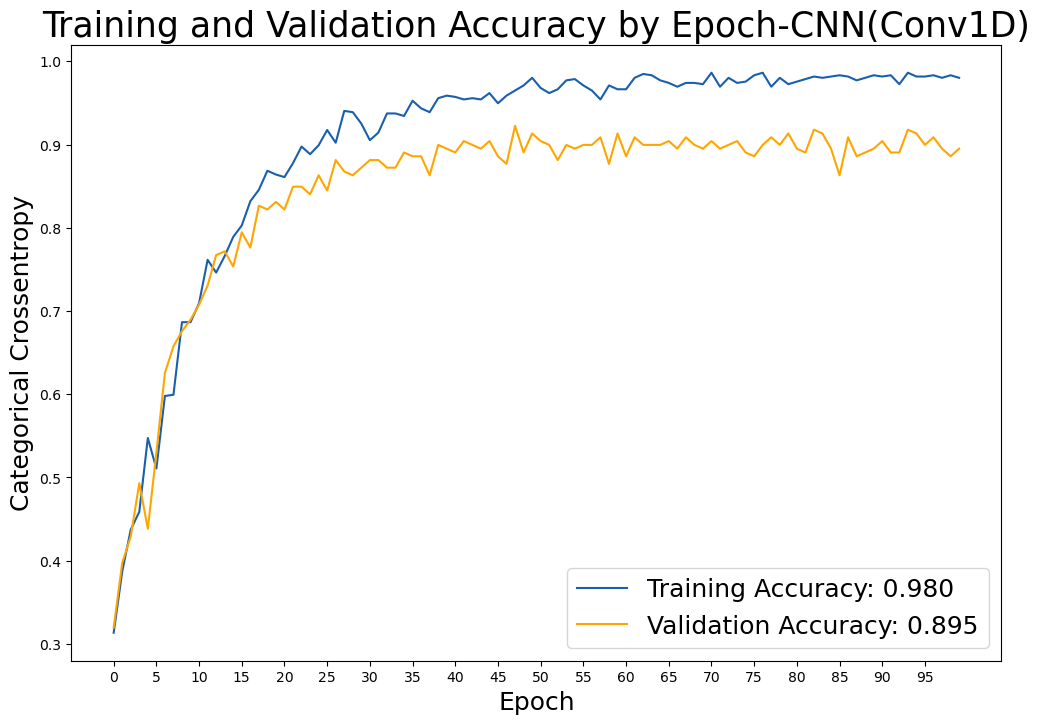

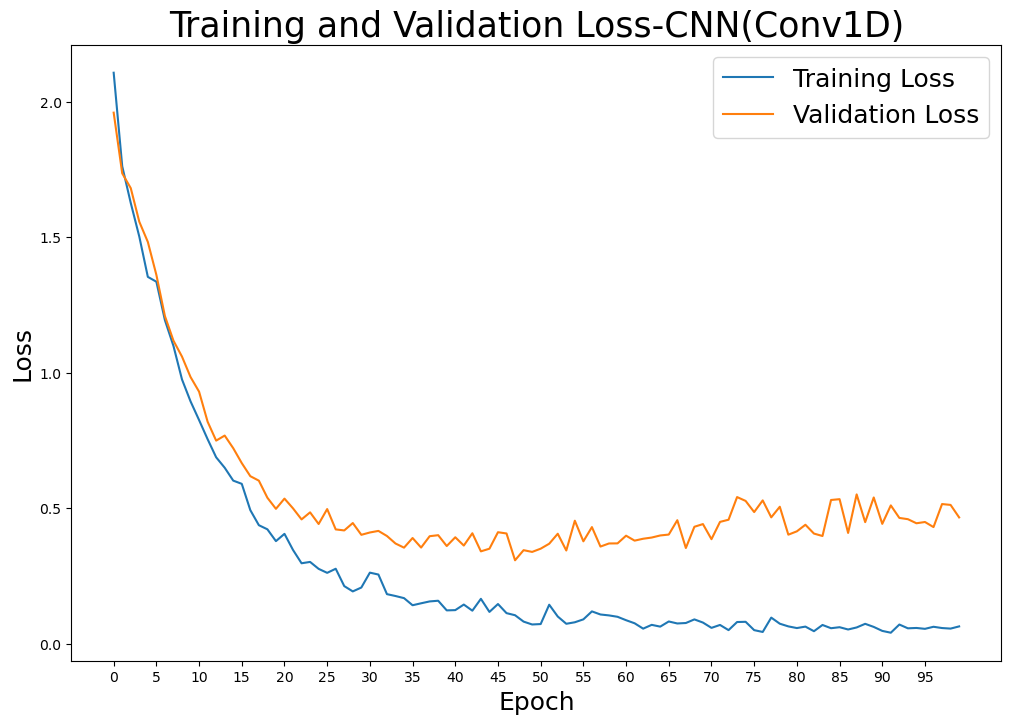

In [18]:
train_accuracy_cnn = history_cnn.history['accuracy']
val_accuracy_cnn = history_cnn.history['val_accuracy']

plt.figure(figsize=(12, 8))

plt.plot(train_accuracy_cnn, label=f'Training Accuracy: {train_accuracy_cnn[-1]:.3f}', color='#185fad')
plt.plot(val_accuracy_cnn, label=f'Validation Accuracy: {val_accuracy_cnn[-1]:.3f}', color='orange')

plt.title('Training and Validation Accuracy by Epoch-CNN(Conv1D)', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Categorical Crossentropy', fontsize=18)
plt.xticks(range(0, 100, 5), range(0, 100, 5))
plt.legend(fontsize=18);

plt.show()

plt.figure(figsize=(12, 8))

plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss-CNN(Conv1D)', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.xticks(range(0, 100, 5), range(0, 100, 5))
plt.legend(fontsize=18)

plt.show()


7/7 [==============================] - 1s 42ms/step
Predicted: 6, True: 6
Predicted: 11, True: 11
Predicted: 10, True: 10
Predicted: 9, True: 9
Predicted: 8, True: 8
Predicted: 7, True: 7
Predicted: 7, True: 7
Predicted: 12, True: 11
Predicted: 8, True: 8
Predicted: 10, True: 10
Predicted: 11, True: 10
Predicted: 6, True: 6
Predicted: 11, True: 11
Predicted: 7, True: 7
Predicted: 10, True: 10
Predicted: 10, True: 10
Predicted: 7, True: 7
Predicted: 10, True: 10
Predicted: 10, True: 10
Predicted: 8, True: 11
Predicted: 8, True: 8
Predicted: 14, True: 14
Predicted: 8, True: 8
Predicted: 8, True: 9
Predicted: 7, True: 7
Predicted: 8, True: 8
Predicted: 9, True: 9
Predicted: 10, True: 10
Predicted: 8, True: 8
Predicted: 6, True: 6
Predicted: 8, True: 10
Predicted: 11, True: 11
Predicted: 10, True: 10
Predicted: 10, True: 10
Predicted: 6, True: 6
Predicted: 6, True: 6
Predicted: 10, True: 10
Predicted: 14, True: 14
Predicted: 10, True: 10
Predicted: 9, True: 9
Predicted: 9, True: 9
Predicte

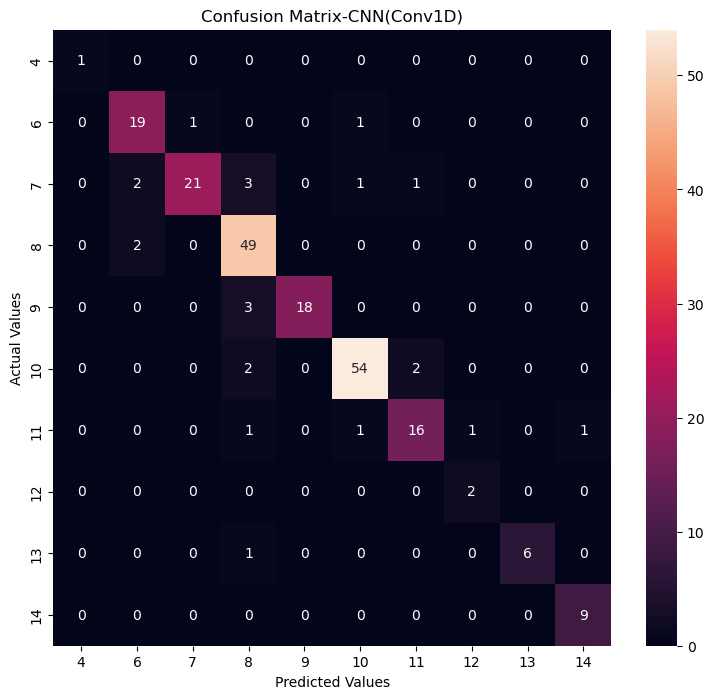

Accuracy: 89.45%
Precision: 0.90
Recall: 0.89
F1 Score: 0.89



In [19]:
#### from sklearn.metrics import classification_report

y_predict_cnn = np.argmax(model_cnn.predict(X_test_cnn), axis=-1)
true_cnn = np.argmax(to_categorical(y_test_cnn[:]), axis = 1)[:,1]

for i,j in zip(y_predict_cnn, true_cnn):
    print("Predicted: {}, True: {}".format(i, j))

print(classification_report(true_cnn, y_predict_cnn))

# CONFUSION MATRIX

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

cm_cnn = confusion_matrix(true_cnn, y_predict_cnn)
unique_values_cnn = np.unique(np.concatenate((true_cnn, y_predict_cnn)))

cm_df_cnn = pd.DataFrame(cm_cnn, index=unique_values_cnn, columns=unique_values_cnn)

plt.figure(figsize=(9, 8))
sns.heatmap(cm_df_cnn, annot=True)
plt.title('Confusion Matrix-CNN(Conv1D)')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

accuracy_cnn = accuracy_score(true_cnn, y_predict_cnn)
print(f'Accuracy: {accuracy_cnn:.2%}')
accuracy_cnn = accuracy_score(true_cnn, y_predict_cnn)
precision_cnn = precision_score(true_cnn, y_predict_cnn, average='weighted')
recall_cnn = recall_score(true_cnn, y_predict_cnn, average='weighted')
f1_cnn = f1_score(true_cnn, y_predict_cnn, average='weighted')
conf_matrix_cnn = confusion_matrix(true_cnn, y_predict_cnn)

print(f'Precision: {precision_cnn:.2f}')
print(f'Recall: {recall_cnn:.2f}')
print(f'F1 Score: {f1_cnn:.2f}')
# print('Confusion Matrix:')
# print(conf_matrix_cnn)
print()


In [20]:
#Conv2D

X_train_cnn2 = X_train_scaled_cnn.reshape((X_train_scaled_cnn.shape[0], X_train_scaled_cnn.shape[1], 1, 1))
X_Val_cnn2 = X_Val.reshape((X_Val.shape[0], X_Val.shape[1], 1, 1))
X_test_cnn2 = X_test_scaled_cnn.reshape((X_test_scaled_cnn.shape[0], X_test_scaled_cnn.shape[1], 1, 1))

model_cnn2 = models.Sequential()

model_cnn2.add(layers.Conv2D(32, kernel_size=(3, 1), activation='relu', input_shape=(X_train_cnn2.shape[1], 1, 1)))
model_cnn2.add(Dropout(0.1))
model_cnn2.add(layers.MaxPooling2D(pool_size=(2, 1)))
model_cnn2.add(layers.Conv2D(64, kernel_size=(3, 1), activation='relu'))
model_cnn2.add(Dropout(0.25))
model_cnn2.add(layers.MaxPooling2D(pool_size=(2, 1)))
model_cnn2.add(layers.Dense(128, activation='relu'))
model_cnn2.add(layers.Dropout(0.5))
model_cnn2.add(layers.Flatten())
model_cnn2.add(layers.Dense(1000, activation='relu'))
model_cnn2.add(layers.Dropout(0.5))
model_cnn2.add(layers.Flatten())
model_cnn2.add(layers.Dense(500, activation='relu'))
model_cnn2.add(layers.Dropout(0.5))
model_cnn2.add(layers.Dense(15, activation='softmax'))

model_cnn2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_cnn2 = model_cnn2.fit(X_train_cnn2, y_train_cnn, epochs=100, batch_size=32, validation_data=(X_Val_cnn2, y_Val_c))


Epoch 1/100
21/21 [==============================] - 14s 282ms/step - loss: 2.0811 - accuracy: 0.3012 - val_loss: 1.8764 - val_accuracy: 0.3790
Epoch 2/100
21/21 [==============================] - 1s 50ms/step - loss: 1.7730 - accuracy: 0.3960 - val_loss: 1.6923 - val_accuracy: 0.4155
Epoch 3/100
21/21 [==============================] - 1s 51ms/step - loss: 1.5502 - accuracy: 0.4878 - val_loss: 1.5987 - val_accuracy: 0.4155
Epoch 4/100
21/21 [==============================] - 1s 52ms/step - loss: 1.4684 - accuracy: 0.4939 - val_loss: 1.4943 - val_accuracy: 0.4521
Epoch 5/100
21/21 [==============================] - 1s 53ms/step - loss: 1.3592 - accuracy: 0.5336 - val_loss: 1.4209 - val_accuracy: 0.4932
Epoch 6/100
21/21 [==============================] - 1s 56ms/step - loss: 1.2030 - accuracy: 0.5673 - val_loss: 1.1941 - val_accuracy: 0.6210
Epoch 7/100
21/21 [==============================] - 1s 49ms/step - loss: 1.1345 - accuracy: 0.6116 - val_loss: 1.1150 - val_accuracy: 0.6484
Epoc

In [21]:
test_loss_cnn2, test_acc_cnn2 = model_cnn2.evaluate(X_test_cnn2, y_test_cnn)
print(f'Test accuracy: {test_acc_cnn2}')


plt.figure(figsize=(12, 8))

train_accuracy_cnn2 = history_cnn2.history['accuracy']
val_accuracy_cnn2 = history_cnn2.history['val_accuracy']

plt.plot(train_accuracy_cnn2, label=f'Training Accuracy: {train_accuracy_cnn2[-1]:.3f}', color='#185fad')
plt.plot(val_accuracy_cnn2, label=f'Validation Accuracy: {val_accuracy_cnn2[-1]:.3f}', color='orange')

plt.title('Training and Validation Accuracy by Epoch-CNN(Conv2D)', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Categorical Crossentropy', fontsize=18)
plt.xticks(range(0, 100, 5), range(0, 100, 5))
plt.legend(fontsize=18);

plt.show()

plt.figure(figsize=(12, 8))

plt.plot(history_cnn2.history['loss'], label='Training Loss')
plt.plot(history_cnn2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss-CNN(Conv2D)', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.xticks(range(0, 100, 5), range(0, 100, 5))
plt.legend(fontsize=18)

plt.show()

In [22]:
### from sklearn.metrics import classification_report

y_predict_cnn2 = np.argmax(model_cnn2.predict(X_test_cnn2), axis=-1)
true_cnn2 = np.argmax(to_categorical(y_test_cnn[:]), axis = 1)[:,1]

for i,j in zip(y_predict_cnn2, true_cnn2):
    print("Predicted: {}, True: {}".format(i, j))

print(classification_report(true_cnn2, y_predict_cnn2))


# CONFUSION MATRIX

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

cm_cnn2 = confusion_matrix(true_cnn2, y_predict_cnn2)
unique_values_cnn2 = np.unique(np.concatenate((true_cnn2, y_predict_cnn2)))

cm_df_cnn2 = pd.DataFrame(cm_cnn2, index=unique_values_cnn2, columns=unique_values_cnn2)

plt.figure(figsize=(9, 8))
sns.heatmap(cm_df_cnn2, annot=True)
plt.title('Confusion Matrix-CNN(Conv2D)')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

accuracy_cnn2 = accuracy_score(true_cnn2, y_predict_cnn2)
print(f'Accuracy: {accuracy_cnn2:.2%}')
accuracy_cnn2 = accuracy_score(true_cnn2, y_predict_cnn2)
precision_cnn2 = precision_score(true_cnn2, y_predict_cnn2, average='weighted')
recall_cnn2 = recall_score(true_cnn2, y_predict_cnn2, average='weighted')
f1_cnn2 = f1_score(true_cnn2, y_predict_cnn2, average='weighted')
conf_matrix_cnn2 = confusion_matrix(true_cnn2, y_predict_cnn2)

print(f'Precision: {precision_cnn2:.2f}')
print(f'Recall: {recall_cnn2:.2f}')
print(f'F1 Score: {f1_cnn2:.2f}')
# print('Confusion Matrix:')
# print(conf_matrix_cnn2)
print()


In [23]:
#----------------------------ANN PCA----------------------------------------

In [ ]:
X_train_ann_p = X_train
X_test_ann_p= X_test

y_train_ann_p = y_train_c
y_test_ann_p = y_test_c

pca = PCA(n_components=0.95)

X_train_ann_p = pca.fit_transform(X_train_ann_p)
X_Val_ann_p = pca.transform(X_Val)
X_test_ann_p = pca.transform(X_test_ann_p)

model_ann_p = Sequential()
model_ann_p.add(Dense(32, input_shape=(X_train_ann_p.shape[1],), activation = 'relu'))
model_ann_p.add(Dropout(0.1))
model_ann_p.add(Dense(64, activation = 'relu'))
model_ann_p.add(Dropout(0.25))
model_ann_p.add(Dense(128, activation = 'relu'))
model_ann_p.add(Dropout(0.5))
model_ann_p.add(Dense(15, activation = 'softmax'))

model_ann_p.summary()

model_ann_p.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
early_stop_ann_p = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')

history_ann_p = model_ann_p.fit(X_train_ann_p, y_train_ann_p, batch_size=32, epochs=100, 
                    validation_data=(X_Val_ann_p, y_Val_c),
                    callbacks=[early_stop_ann_p],verbose=1)

train_accuracy_ann_p = history_ann_p.history['accuracy']
val_accuracy_ann_p = history_ann_p.history['val_accuracy']

plt.figure(figsize=(12, 8))

plt.plot(train_accuracy_ann_p, label=f'Training Accuracy: {train_accuracy_ann_p[-1]:.3f}', color='#185fad')
plt.plot(val_accuracy_ann_p, label=f'Validation Accuracy: {val_accuracy_ann_p[-1]:.3f}', color='orange')

plt.title('Training and Validation Accuracy by Epoch-ANN(PCA)', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Categorical Crossentropy', fontsize=18)
plt.xticks(range(0, 100, 5), range(0, 100, 5))
plt.legend(fontsize=18);

plt.show()

plt.figure(figsize=(12, 8))

plt.plot(history_ann_p.history['loss'], label='Training Loss')
plt.plot(history_ann_p.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss-ANN(PCA)', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.xticks(range(0, 100, 5), range(0, 100, 5))
plt.legend(fontsize=18)

plt.show()


from sklearn.metrics import classification_report

y_predict_ann_p = np.argmax(model_ann_p.predict(X_test_ann_p), axis=-1)
true_ann_p = np.argmax(to_categorical(y_test_ann_p[:]), axis = 1)[:,1]

for i,j in zip(y_predict_ann_p, true_ann_p):
    print("Predicted: {}, True: {}".format(i, j))

print(classification_report(true_ann_p, y_predict_ann_p))


test_loss_ann_p, test_acc_ann_p = model_ann_p.evaluate(X_test_ann_p, y_test_ann_p)
print(f'Test accuracy: {test_acc_ann_p}')


In [ ]:
# CONFUSION MATRIX

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

cm_p = confusion_matrix(true_ann_p, y_predict_ann_p)
unique_values_p = np.unique(np.concatenate((true_ann_p, y_predict_ann_p)))

cm_df_p = pd.DataFrame(cm_p, index=unique_values_p, columns=unique_values_p)

plt.figure(figsize=(9, 8))
sns.heatmap(cm_df_p, annot=True)
plt.title('Confusion MatriANN(PCA)')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

accuracy_p = accuracy_score(true_ann_p, y_predict_ann_p)
print(f'Accuracy: {accuracy_p:.2%}')
accuracy_p = accuracy_score(true_ann_p, y_predict_ann_p)
precision_p = precision_score(true_ann_p, y_predict_ann_p, average='weighted')
recall_p = recall_score(true_ann_p, y_predict_ann_p, average='weighted')
f1_p = f1_score(true_ann_p, y_predict_ann_p, average='weighted')
conf_matrix_p = confusion_matrix(true_ann_p, y_predict_ann_p)

print(f'Precision: {precision_p:.2f}')
print(f'Recall: {recall_p:.2f}')
print(f'F1 Score: {f1_p:.2f}')
# print('Confusion Matrix:')
# print(conf_matrix_p)
print()


In [ ]:
#--------------------------CNN PCA------------------------------------------

In [ ]:
X_train_n_cnn_p = X_train
X_test_n_cnn_p = X_test

y_train_cnn_p = y_train_c
y_test_cnn_p = y_test_c

pca = PCA(n_components=0.95)

X_train_scaled_cnn_p = pca.fit_transform(X_train_n_cnn_p)
X_Val_scaled_cnn_p = pca.transform(X_Val)
X_test_scaled_cnn_p = pca.transform(X_test_n_cnn_p)

X_train_cnn_p = X_train_scaled_cnn_p.reshape((X_train_scaled_cnn_p.shape[0], X_train_scaled_cnn_p.shape[1], 1))
X_Val_cnn_p = X_Val_scaled_cnn_p.reshape((X_Val_scaled_cnn_p.shape[0], X_Val_scaled_cnn_p.shape[1], 1))
X_test_cnn_p = X_test_scaled_cnn_p.reshape((X_test_scaled_cnn_p.shape[0], X_test_scaled_cnn_p.shape[1], 1))

#Conv1D

model_cnn_p = models.Sequential()

model_cnn_p.add(layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_cnn_p.shape[1], 1)))
model_cnn_p.add(layers.MaxPooling1D(pool_size=2))
model_cnn_p.add(layers.Conv1D(64, kernel_size=3, activation='relu'))
model_cnn_p.add(layers.MaxPooling1D(pool_size=2))
model_cnn_p.add(layers.Flatten())
model_cnn_p.add(layers.Dense(128, activation='relu'))
model_cnn_p.add(layers.Dropout(0.5))
model_cnn_p.add(layers.Dense(15, activation='softmax')) 

model_cnn_p.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_cnn_p = model_cnn_p.fit(X_train_cnn_p, y_train_cnn_p, epochs=100, batch_size=32,validation_data=(X_Val_cnn_p, y_Val_c))



test_loss_cnn_p, test_acc_cnn_p = model_cnn_p.evaluate(X_test_cnn_p, y_test_cnn_p)
print(f'Test accuracy: {test_acc_cnn_p}')

train_accuracy_cnn_p = history_cnn_p.history['accuracy']
val_accuracy_cnn_p = history_cnn_p.history['val_accuracy']

plt.figure(figsize=(12, 8))

plt.plot(train_accuracy_cnn_p, label=f'Training Accuracy: {train_accuracy_cnn_p[-1]:.3f}', color='#185fad')
plt.plot(val_accuracy_cnn_p, label=f'Validation Accuracy: {val_accuracy_cnn_p[-1]:.3f}', color='orange')

plt.title('Training and Validation Accuracy by Epoch-CNN(Conv1D)', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Categorical Crossentropy', fontsize=18)
plt.xticks(range(0, 100, 5), range(0, 100, 5))
plt.legend(fontsize=18);

plt.show()

plt.figure(figsize=(12, 8))

plt.plot(history_cnn_p.history['loss'], label='Training Loss')
plt.plot(history_cnn_p.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss-CNN(Conv1D-PCA)', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.xticks(range(0, 100, 5), range(0, 100, 5))
plt.legend(fontsize=18)

plt.show()


from sklearn.metrics import classification_report

y_predict_cnn_p = np.argmax(model_cnn_p.predict(X_test_cnn_p), axis=-1)
true_cnn_p = np.argmax(to_categorical(y_test_cnn_p[:]), axis = 1)[:,1]

for i,j in zip(y_predict_cnn_p, true_cnn_p):
    print("Predicted: {}, True: {}".format(i, j))

print(classification_report(true_cnn_p, y_predict_cnn_p))

# CONFUSION MATRIX

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

cm_cnn_p = confusion_matrix(true_cnn_p, y_predict_cnn_p)
unique_values_cnn_p = np.unique(np.concatenate((true_cnn_p, y_predict_cnn_p)))

cm_df_cnn_p = pd.DataFrame(cm_cnn_p, index=unique_values_cnn_p, columns=unique_values_cnn_p)

plt.figure(figsize=(9, 8))
sns.heatmap(cm_df_cnn_p, annot=True)
plt.title('Confusion Matrix-CNN(Conv1D-PCA)')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

accuracy_cnn_p = accuracy_score(true_cnn_p, y_predict_cnn_p)
print(f'Accuracy: {accuracy_cnn_p:.2%}')
accuracy_cnn_p = accuracy_score(true_cnn_p, y_predict_cnn_p)
precision_cnn_p = precision_score(true_cnn_p, y_predict_cnn_p, average='weighted')
recall_cnn_p = recall_score(true_cnn_p, y_predict_cnn_p, average='weighted')
f1_cnn_p = f1_score(true_cnn_p, y_predict_cnn_p, average='weighted')
conf_matrix_cnn_p = confusion_matrix(true_cnn_p, y_predict_cnn_p)

print(f'Precision: {precision_cnn_p:.2f}')
print(f'Recall: {recall_cnn_p:.2f}')
print(f'F1 Score: {f1_cnn_p:.2f}')
# print('Confusion Matrix:')
# print(conf_matrix_cnn_p)
print()


#Conv2D

X_train_cnn2_p = X_train_scaled_cnn_p.reshape((X_train_scaled_cnn_p.shape[0], X_train_scaled_cnn_p.shape[1], 1, 1))
X_Val_cnn2_p = X_Val_scaled_cnn_p.reshape((X_Val_scaled_cnn_p.shape[0], X_Val_scaled_cnn_p.shape[1], 1, 1))
X_test_cnn2_p = X_test_scaled_cnn_p.reshape((X_test_scaled_cnn_p.shape[0], X_test_scaled_cnn_p.shape[1], 1, 1))

model_cnn2_p = models.Sequential()

model_cnn2_p.add(layers.Conv2D(32, kernel_size=(3, 1), activation='relu', input_shape=(X_train_cnn2_p.shape[1], 1, 1)))
model_cnn2_p.add(layers.MaxPooling2D(pool_size=(2, 1)))
model_cnn2_p.add(layers.Conv2D(64, kernel_size=(3, 1), activation='relu'))
model_cnn2_p.add(layers.MaxPooling2D(pool_size=(2, 1)))
model_cnn2_p.add(layers.Flatten())
model_cnn2_p.add(layers.Dense(128, activation='relu'))
model_cnn2_p.add(layers.Dropout(0.5))
model_cnn2_p.add(layers.Dense(15, activation='softmax'))

model_cnn2_p.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_cnn2_p = model_cnn2_p.fit(X_train_cnn2_p, y_train_cnn_p, epochs=100, batch_size=32,validation_data=(X_Val_cnn2_p, y_Val_c))

test_loss_cnn2_p, test_acc_cnn2_p = model_cnn2_p.evaluate(X_test_cnn2_p, y_test_cnn_p)
print(f'Test accuracy: {test_acc_cnn2_p}')

plt.figure(figsize=(12, 8))

train_accuracy_cnn2_p = history_cnn2_p.history['accuracy']
val_accuracy_cnn2_p = history_cnn2_p.history['val_accuracy']

plt.plot(train_accuracy_cnn2_p, label=f'Training Accuracy: {train_accuracy_cnn2_p[-1]:.3f}', color='#185fad')
plt.plot(val_accuracy_cnn2_p, label=f'Validation Accuracy: {val_accuracy_cnn2_p[-1]:.3f}', color='orange')

plt.title('Training and Validation Accuracy by Epoch-CNN(Conv2D-PCA)', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Categorical Crossentropy', fontsize=18)
plt.xticks(range(0, 100, 5), range(0, 100, 5))
plt.legend(fontsize=18);

plt.show()

plt.figure(figsize=(12, 8))

plt.plot(history_cnn2_p.history['loss'], label='Training Loss')
plt.plot(history_cnn2_p.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss-CNN(Conv2D-PCA)', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.xticks(range(0, 100, 5), range(0, 100, 5))
plt.legend(fontsize=18)

plt.show()

from sklearn.metrics import classification_report

y_predict_cnn2_p = np.argmax(model_cnn2_p.predict(X_test_cnn2_p), axis=-1)
true_cnn2_p = np.argmax(to_categorical(y_test_cnn_p[:]), axis = 1)[:,1]

for i,j in zip(y_predict_cnn2_p, true_cnn2_p):
    print("Predicted: {}, True: {}".format(i, j))

print(classification_report(true_cnn2_p, y_predict_cnn2_p))


# CONFUSION MATRIX

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

cm_cnn2_p = confusion_matrix(true_cnn2_p, y_predict_cnn2_p)
unique_values_cnn2_p = np.unique(np.concatenate((true_cnn2_p, y_predict_cnn2_p)))

cm_df_cnn2_p = pd.DataFrame(cm_cnn2_p, index=unique_values_cnn2_p, columns=unique_values_cnn2_p)

plt.figure(figsize=(9, 8))
sns.heatmap(cm_df_cnn2_p, annot=True)
plt.title('Confusion Matrix-CNN(Conv2D-PCA)')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

accuracy_cnn2_p = accuracy_score(true_cnn2_p, y_predict_cnn2_p)
print(f'Accuracy: {accuracy_cnn2_p:.2%}')
accuracy_cnn2_p = accuracy_score(true_cnn2_p, y_predict_cnn2_p)
precision_cnn2_p = precision_score(true_cnn2_p, y_predict_cnn2_p, average='weighted')
recall_cnn2_p = recall_score(true_cnn2_p, y_predict_cnn2_p, average='weighted')
f1_cnn2_p = f1_score(true_cnn2_p, y_predict_cnn2_p, average='weighted')
conf_matrix_cnn2_p = confusion_matrix(true_cnn2_p, y_predict_cnn2_p)

print(f'Precision: {precision_cnn2_p:.2f}')
print(f'Recall: {recall_cnn2_p:.2f}')
print(f'F1 Score: {f1_cnn2_p:.2f}')
# print('Confusion Matrix:')
# print(conf_matrix_cnn2_p)
print()


In [ ]:
import os
destination_folder = r"D:\ML\PF STAR IMAGES"
os.makedirs(destination_folder, exist_ok=True)

# print("SVM(rbf) Accuracy:", f"{accuracy_rbf * 100:.2f}%")
# print(f'Test accuracy-ANN: {test_acc_ann}')
# print(f'Test accuracy-CNN(Conv1D): {test_acc_cnn}')
# print(f'Test accuracy-CNN(Conv2D): {test_acc_cnn2}')
# print(f'Test accuracy ANN(PCA): {test_acc_ann_p}')
# print(f'Test accuracy(Conv1D-PCA): {test_acc_cnn_p}')
# print(f'Test accuracy(Conv2D-PCA): {test_acc_cnn2_p}')


# print("------------------------SVM----------------------------")
# print("SVM(rbf) Accuracy:", f"{accuracy_rbf * 100:.2f}%")

# plt.figure(figsize=(9, 8))
# sns.heatmap(cm_df_svm, annot=True)
# plt.title('Confusion Matrix-SVM')
# plt.ylabel('Actual Values')
# plt.xlabel('Predicted Values')
# plt.savefig(os.path.join(destination_folder, 'MFCC+Tonnetz_Confusion Matrix-SVM.png'))
# plt.show()
# plt.close()



# print(f'Accuracy: {accuracy_rbf:.2%}')
# print(f'Precision: {precision_S:.2f}')
# print(f'Recall: {recall_S:.2f}')
# print(f'F1 Score: {f1_S:.2f}')
# # print('Confusion Matrix:')
# # print(conf_matrix_S)
# print()

# print("------------------------ANN----------------------------")

# plt.figure(figsize=(12, 8))

# plt.plot(train_accuracy_ann, label=f'Training Accuracy: {train_accuracy_ann[-1]:.3f}', color='#185fad')
# plt.plot(val_accuracy_ann, label=f'Validation Accuracy: {val_accuracy_ann[-1]:.3f}', color='orange')

# plt.title('Training and Validation Accuracy-ANN', fontsize=25)
# plt.xlabel('Epoch', fontsize=18)
# plt.ylabel('Categorical Crossentropy', fontsize=18)
# plt.xticks(range(0, 100, 5), range(0, 100, 5))
# plt.legend(fontsize=18);
# plt.savefig(os.path.join(destination_folder, 'MFCC+Tonnetz_Training and Validation Accuracy-ANN.png'))
# plt.show()
# plt.close()

# plt.figure(figsize=(12, 8))

# plt.plot(history_ann.history['loss'], label='Training Loss')
# plt.plot(history_ann.history['val_loss'], label='Validation Loss')
# plt.title('Training and Validation Loss-ANN', fontsize=25)
# plt.xlabel('Epoch', fontsize=18)
# plt.ylabel('Loss', fontsize=18)
# plt.xticks(range(0, 100, 5), range(0, 100, 5))
# plt.legend(fontsize=18)
# plt.savefig(os.path.join(destination_folder, 'MFCC+Tonnetz_Training and Validation Loss-ANN.png'))
# plt.show()
# plt.close()

# print(f'Test accuracy-ANN: {test_acc_ann}')

# plt.figure(figsize=(9, 8))
# sns.heatmap(cm_df, annot=True)
# plt.title('Confusion Matrix-ANN')
# plt.ylabel('Actual Values')
# plt.xlabel('Predicted Values')
# plt.savefig(os.path.join(destination_folder, 'MFCC+Tonnetz_Confusion Matrix-ANN.png'))
# plt.show()
# plt.close()

# print(f'Accuracy: {accuracy_ann:.2%}')
# print(f'Precision: {precision_ann:.2f}')
# print(f'Recall: {recall_ann:.2f}')
# print(f'F1 Score: {f1_ann:.2f}')
# # print('Confusion Matrix:')
# # print(conf_matrix_ann)
# print()


# print("------------------------CNN(Conv1D)----------------------------")

# plt.figure(figsize=(12, 8))

# plt.plot(train_accuracy_cnn, label=f'Training Accuracy: {train_accuracy_cnn[-1]:.3f}', color='#185fad')
# plt.plot(val_accuracy_cnn, label=f'Validation Accuracy: {val_accuracy_cnn[-1]:.3f}', color='orange')

# plt.title('Training and Validation Accuracy-CNN(Conv1D)', fontsize=25)
# plt.xlabel('Epoch', fontsize=18)
# plt.ylabel('Categorical Crossentropy', fontsize=18)
# plt.xticks(range(0, 100, 5), range(0, 100, 5))
# plt.legend(fontsize=18);
# plt.savefig(os.path.join(destination_folder, 'MFCC+Tonnetz_Training and Validation Accuracy-CNN(Conv1D).png'))
# plt.show()
# plt.close()

# plt.figure(figsize=(12, 8))

# plt.plot(history_cnn.history['loss'], label='Training Loss')
# plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
# plt.title('Training and Validation Loss-CNN(Conv1D)', fontsize=25)
# plt.xlabel('Epoch', fontsize=18)
# plt.ylabel('Loss', fontsize=18)
# plt.xticks(range(0, 100, 5), range(0, 100, 5))
# plt.legend(fontsize=18)
# plt.savefig(os.path.join(destination_folder, 'MFCC+Tonnetz_Training and Validation Loss-CNN(Conv1D).png'))
# plt.show()
# plt.close()

# print(f'Test accuracy-CNN(Conv1D): {test_acc_cnn}')

# plt.figure(figsize=(9, 8))
# sns.heatmap(cm_df_cnn, annot=True)
# plt.title('Confusion Matrix-CNN(Conv1D)')
# plt.ylabel('Actual Values')
# plt.xlabel('Predicted Values')
# plt.savefig(os.path.join(destination_folder, 'MFCC+Tonnetz_Confusion Matrix-CNN(Conv1D).png'))
# plt.show()
# plt.close()

# print(f'Accuracy: {accuracy_cnn:.2%}')
# print(f'Precision: {precision_cnn:.2f}')
# print(f'Recall: {recall_cnn:.2f}')
# print(f'F1 Score: {f1_cnn:.2f}')
# # print('Confusion Matrix:')
# # print(conf_matrix_cnn)
# print()

# print("------------------------CNN(Conv2D)----------------------------")

# plt.figure(figsize=(12, 8))

# plt.plot(train_accuracy_cnn2, label=f'Training Accuracy: {train_accuracy_cnn2[-1]:.3f}', color='#185fad')
# plt.plot(val_accuracy_cnn2, label=f'Validation Accuracy: {val_accuracy_cnn2[-1]:.3f}', color='orange')

# plt.title('Training and Validation Accuracy-CNN(Conv2D)', fontsize=25)
# plt.xlabel('Epoch', fontsize=18)
# plt.ylabel('Categorical Crossentropy', fontsize=18)
# plt.xticks(range(0, 100, 5), range(0, 100, 5))
# plt.legend(fontsize=18);
# plt.savefig(os.path.join(destination_folder, 'MFCC+Tonnetz_Training and Validation Accuracy-CNN(Conv2D).png'))
# plt.show()
# plt.close()

# plt.figure(figsize=(12, 8))

# plt.plot(history_cnn2.history['loss'], label='Training Loss')
# plt.plot(history_cnn2.history['val_loss'], label='Validation Loss')
# plt.title('Training and Validation Loss-CNN(Conv2D)', fontsize=25)
# plt.xlabel('Epoch', fontsize=18)
# plt.ylabel('Loss', fontsize=18)
# plt.xticks(range(0, 100, 5), range(0, 100, 5))
# plt.legend(fontsize=18)
# plt.savefig(os.path.join(destination_folder, 'MFCC+Tonnetz_Training and Validation Loss-CNN(Conv2D).png'))
# plt.show()
# plt.close()

# print(f'Test accuracy-CNN(Conv2D): {test_acc_cnn2}')

# plt.figure(figsize=(9, 8))
# sns.heatmap(cm_df_cnn2, annot=True)
# plt.title('Confusion Matrix-CNN(Conv2D)')
# plt.ylabel('Actual Values')
# plt.xlabel('Predicted Values')
# plt.savefig(os.path.join(destination_folder, 'MFCC+Tonnetz_Confusion Matrix-CNN(Conv2D).png'))
# plt.show()
# plt.close()

# print(f'Accuracy: {accuracy_cnn2:.2%}')
# print(f'Precision: {precision_cnn2:.2f}')
# print(f'Recall: {recall_cnn2:.2f}')
# print(f'F1 Score: {f1_cnn2:.2f}')
# # print('Confusion Matrix:')
# # print(conf_matrix_cnn2)
# print()



# print("------------------------ANN(PCA)----------------------------")

# plt.figure(figsize=(12, 8))

# plt.plot(train_accuracy_ann_p, label=f'Training Accuracy: {train_accuracy_ann_p[-1]:.3f}', color='#185fad')
# plt.plot(val_accuracy_ann_p, label=f'Validation Accuracy: {val_accuracy_ann_p[-1]:.3f}', color='orange')

# plt.title('Training and Validation Accuracy-ANN(PCA)', fontsize=25)
# plt.xlabel('Epoch', fontsize=18)
# plt.ylabel('Categorical Crossentropy', fontsize=18)
# plt.xticks(range(0, 100, 5), range(0, 100, 5))
# plt.legend(fontsize=18);
# plt.savefig(os.path.join(destination_folder, 'MFCC+Tonnetz_Training and Validation Accuracy-ANN(PCA).png'))
# plt.show()
# plt.close()

# plt.figure(figsize=(12, 8))

# plt.plot(history_ann_p.history['loss'], label='Training Loss')
# plt.plot(history_ann_p.history['val_loss'], label='Validation Loss')
# plt.title('Training and Validation Loss-ANN(PCA)', fontsize=25)
# plt.xlabel('Epoch', fontsize=18)
# plt.ylabel('Loss', fontsize=18)
# plt.xticks(range(0, 100, 5), range(0, 100, 5))
# plt.legend(fontsize=18)
# plt.savefig(os.path.join(destination_folder, 'MFCC+Tonnetz_Training and Validation Loss-ANN(PCA).png'))
# plt.show()
# plt.close()


# print(f'Test accuracy ANN(PCA): {test_acc_ann_p}')
# plt.figure(figsize=(9, 8))
# sns.heatmap(cm_df_p, annot=True)
# plt.title('Confusion Matrix ANN(PCA)')
# plt.ylabel('Actual Values')
# plt.xlabel('Predicted Values')
# plt.savefig(os.path.join(destination_folder, 'MFCC+Tonnetz_Confusion Matrix ANN(PCA).png'))
# plt.show()
# plt.close()

# print(f'Accuracy: {accuracy_p:.2%}')
# print(f'Precision: {precision_p:.2f}')
# print(f'Recall: {recall_p:.2f}')
# print(f'F1 Score: {f1_p:.2f}')
# # print('Confusion Matrix:')
# # print(conf_matrix_p)
# print()


# print("------------------------CNN(Conv1D-PCA)----------------------------")
# plt.figure(figsize=(12, 8))

# plt.plot(train_accuracy_cnn_p, label=f'Training Accuracy: {train_accuracy_cnn_p[-1]:.3f}', color='#185fad')
# plt.plot(val_accuracy_cnn_p, label=f'Validation Accuracy: {val_accuracy_cnn_p[-1]:.3f}', color='orange')

# plt.title('Training and Validation Accuracy-CNN(Conv1D-PCA)', fontsize=25)
# plt.xlabel('Epoch', fontsize=18)
# plt.ylabel('Categorical Crossentropy', fontsize=18)
# plt.xticks(range(0, 100, 5), range(0, 100, 5))
# plt.legend(fontsize=18);
# plt.savefig(os.path.join(destination_folder, 'MFCC+Tonnetz_Training and Validation Accuracy-CNN(Conv1D-PCA).png'))
# plt.show()
# plt.close()

# plt.figure(figsize=(12, 8))

# plt.plot(history_cnn_p.history['loss'], label='Training Loss')
# plt.plot(history_cnn_p.history['val_loss'], label='Validation Loss')
# plt.title('Training and Validation Loss-CNN(Conv1D-PCA)', fontsize=25)
# plt.xlabel('Epoch', fontsize=18)
# plt.ylabel('Loss', fontsize=18)
# plt.xticks(range(0, 100, 5), range(0, 100, 5))
# plt.legend(fontsize=18)
# plt.savefig(os.path.join(destination_folder, 'MFCC+Tonnetz_Training and Validation Loss-CNN(Conv1D-PCA).png'))
# plt.show()
# plt.close()

# print(f'Test accuracy(Conv1D-PCA): {test_acc_cnn_p}')

# plt.figure(figsize=(9, 8))
# sns.heatmap(cm_df_cnn_p, annot=True)
# plt.title('Confusion Matrix-CNN(Conv1D-PCA)')
# plt.ylabel('Actual Values')
# plt.xlabel('Predicted Values')
# plt.savefig(os.path.join(destination_folder, 'MFCC+Tonnetz_Confusion Matrix-CNN(Conv1D-PCA).png'))
# plt.show()
# plt.close()

# print(f'Accuracy: {accuracy_cnn_p:.2%}')
# print(f'Precision: {precision_cnn_p:.2f}')
# print(f'Recall: {recall_cnn_p:.2f}')
# print(f'F1 Score: {f1_cnn_p:.2f}')
# # print('Confusion Matrix:')
# # print(conf_matrix_cnn_p)
# print()


# print("------------------------CNN(Conv2D-PCA)----------------------------")

# plt.figure(figsize=(12, 8))

# train_accuracy_cnn2_p = history_cnn2_p.history['accuracy']
# val_accuracy_cnn2_p = history_cnn2_p.history['val_accuracy']

# plt.plot(train_accuracy_cnn2_p, label=f'Training Accuracy: {train_accuracy_cnn2_p[-1]:.3f}', color='#185fad')
# plt.plot(val_accuracy_cnn2_p, label=f'Validation Accuracy: {val_accuracy_cnn2_p[-1]:.3f}', color='orange')

# plt.title('Training and Validation Accuracy-CNN(Conv2D-PCA)', fontsize=25)
# plt.xlabel('Epoch', fontsize=18)
# plt.ylabel('Categorical Crossentropy', fontsize=18)
# plt.xticks(range(0, 100, 5), range(0, 100, 5))
# plt.legend(fontsize=18);
# plt.savefig(os.path.join(destination_folder, 'MFCC+Tonnetz_Training and Validation Accuracy-CNN(Conv2D-PCA).png'))
# plt.show()
# plt.close()


# plt.figure(figsize=(12, 8))

# plt.plot(history_cnn2_p.history['loss'], label='Training Loss')
# plt.plot(history_cnn2_p.history['val_loss'], label='Validation Loss')
# plt.title('Training and Validation Loss-CNN(Conv2D-PCA)', fontsize=25)
# plt.xlabel('Epoch', fontsize=18)
# plt.ylabel('Loss', fontsize=18)
# plt.xticks(range(0, 100, 5), range(0, 100, 5))
# plt.legend(fontsize=18)
# plt.savefig(os.path.join(destination_folder, 'MFCC+Tonnetz_Training and Validation Loss-CNN(Conv2D-PCA).png'))
# plt.show()
# plt.close()

# print(f'Test accuracy(Conv2D-PCA): {test_acc_cnn2_p}')
# plt.figure(figsize=(9, 8))
# sns.heatmap(cm_df_cnn2_p, annot=True)
# plt.title('Confusion Matrix-CNN(Conv2D-PCA)')
# plt.ylabel('Actual Values')
# plt.xlabel('Predicted Values')
# plt.savefig(os.path.join(destination_folder, 'MFCC+Tonnetz_Confusion Matrix-CNN(Conv2D-PCA).png'))
# plt.show()
# plt.close()

# print(f'Accuracy: {accuracy_cnn2_p:.2%}')
# print(f'Precision: {precision_cnn2_p:.2f}')
# print(f'Recall: {recall_cnn2_p:.2f}')
# print(f'F1 Score: {f1_cnn2_p:.2f}')
# # print('Confusion Matrix:')
# # print(conf_matrix_cnn2_p)
# print()

#--------------------------------------------------------------------------
#--------------------------------------------------------------------------
#--------------------------------------------------------------------------
#--------------------------------------------------------------------------


print("SVM(rbf) Accuracy:", f"{accuracy_rbf * 100:.2f}%")
print(f'Test accuracy-ANN: {test_acc_ann}')
print(f'Test accuracy-CNN(Conv1D): {test_acc_cnn}')
print(f'Test accuracy-CNN(Conv2D): {test_acc_cnn2}')
print(f'Test accuracy ANN(PCA): {test_acc_ann_p}')
print(f'Test accuracy(Conv1D-PCA): {test_acc_cnn_p}')
print(f'Test accuracy(Conv2D-PCA): {test_acc_cnn2_p}')


print("------------------------SVM----------------------------")
print("SVM(rbf) Accuracy:", f"{accuracy_rbf * 100:.2f}%")

plt.figure(figsize=(9, 8))
sns.heatmap(cm_df_svm, annot=True)
plt.title('Confusion Matrix-SVM')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.savefig(os.path.join(destination_folder, 'MFCC+Spectral+ZCR+RMS+Chroma_Confusion Matrix-SVM.png'))
plt.show()
plt.close()



print(f'Accuracy: {accuracy_rbf:.2%}')
print(f'Precision: {precision_S:.2f}')
print(f'Recall: {recall_S:.2f}')
print(f'F1 Score: {f1_S:.2f}')
# print('Confusion Matrix:')
# print(conf_matrix_S)
print()

print("------------------------ANN----------------------------")

plt.figure(figsize=(12, 8))

plt.plot(train_accuracy_ann, label=f'Training Accuracy: {train_accuracy_ann[-1]:.3f}', color='#185fad')
plt.plot(val_accuracy_ann, label=f'Validation Accuracy: {val_accuracy_ann[-1]:.3f}', color='orange')

plt.title('Training and Validation Accuracy-ANN', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Categorical Crossentropy', fontsize=18)
plt.xticks(range(0, 100, 5), range(0, 100, 5))
plt.legend(fontsize=18);
plt.savefig(os.path.join(destination_folder, 'MFCC+Spectral+ZCR+RMS+Chroma_Training and Validation Accuracy-ANN.png'))
plt.show()
plt.close()

plt.figure(figsize=(12, 8))

plt.plot(history_ann.history['loss'], label='Training Loss')
plt.plot(history_ann.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss-ANN', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.xticks(range(0, 100, 5), range(0, 100, 5))
plt.legend(fontsize=18)
plt.savefig(os.path.join(destination_folder, 'MFCC+Spectral+ZCR+RMS+Chroma_Training and Validation Loss-ANN.png'))
plt.show()
plt.close()

print(f'Test accuracy-ANN: {test_acc_ann}')

plt.figure(figsize=(9, 8))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix-ANN')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.savefig(os.path.join(destination_folder, 'MFCC+Spectral+ZCR+RMS+Chroma_Confusion Matrix-ANN.png'))
plt.show()
plt.close()

print(f'Accuracy: {accuracy_ann:.2%}')
print(f'Precision: {precision_ann:.2f}')
print(f'Recall: {recall_ann:.2f}')
print(f'F1 Score: {f1_ann:.2f}')
# print('Confusion Matrix:')
# print(conf_matrix_ann)
print()


print("------------------------CNN(Conv1D)----------------------------")

plt.figure(figsize=(12, 8))

plt.plot(train_accuracy_cnn, label=f'Training Accuracy: {train_accuracy_cnn[-1]:.3f}', color='#185fad')
plt.plot(val_accuracy_cnn, label=f'Validation Accuracy: {val_accuracy_cnn[-1]:.3f}', color='orange')

plt.title('Training and Validation Accuracy-CNN(Conv1D)', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Categorical Crossentropy', fontsize=18)
plt.xticks(range(0, 100, 5), range(0, 100, 5))
plt.legend(fontsize=18);
plt.savefig(os.path.join(destination_folder, 'MFCC+Spectral+ZCR+RMS+Chroma_Training and Validation Accuracy-CNN(Conv1D).png'))
plt.show()
plt.close()

plt.figure(figsize=(12, 8))

plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss-CNN(Conv1D)', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.xticks(range(0, 100, 5), range(0, 100, 5))
plt.legend(fontsize=18)
plt.savefig(os.path.join(destination_folder, 'MFCC+Spectral+ZCR+RMS+Chroma_Training and Validation Loss-CNN(Conv1D).png'))
plt.show()
plt.close()

print(f'Test accuracy-CNN(Conv1D): {test_acc_cnn}')

plt.figure(figsize=(9, 8))
sns.heatmap(cm_df_cnn, annot=True)
plt.title('Confusion Matrix-CNN(Conv1D)')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.savefig(os.path.join(destination_folder, 'MFCC+Spectral+ZCR+RMS+Chroma_Confusion Matrix-CNN(Conv1D).png'))
plt.show()
plt.close()

print(f'Accuracy: {accuracy_cnn:.2%}')
print(f'Precision: {precision_cnn:.2f}')
print(f'Recall: {recall_cnn:.2f}')
print(f'F1 Score: {f1_cnn:.2f}')
# print('Confusion Matrix:')
# print(conf_matrix_cnn)
print()

print("------------------------CNN(Conv2D)----------------------------")

plt.figure(figsize=(12, 8))

plt.plot(train_accuracy_cnn2, label=f'Training Accuracy: {train_accuracy_cnn2[-1]:.3f}', color='#185fad')
plt.plot(val_accuracy_cnn2, label=f'Validation Accuracy: {val_accuracy_cnn2[-1]:.3f}', color='orange')

plt.title('Training and Validation Accuracy-CNN(Conv2D)', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Categorical Crossentropy', fontsize=18)
plt.xticks(range(0, 100, 5), range(0, 100, 5))
plt.legend(fontsize=18);
plt.savefig(os.path.join(destination_folder, 'MFCC+Spectral+ZCR+RMS+Chroma_Training and Validation Accuracy-CNN(Conv2D).png'))
plt.show()
plt.close()

plt.figure(figsize=(12, 8))

plt.plot(history_cnn2.history['loss'], label='Training Loss')
plt.plot(history_cnn2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss-CNN(Conv2D)', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.xticks(range(0, 100, 5), range(0, 100, 5))
plt.legend(fontsize=18)
plt.savefig(os.path.join(destination_folder, 'MFCC+Spectral+ZCR+RMS+Chroma_Training and Validation Loss-CNN(Conv2D).png'))
plt.show()
plt.close()

print(f'Test accuracy-CNN(Conv2D): {test_acc_cnn2}')

plt.figure(figsize=(9, 8))
sns.heatmap(cm_df_cnn2, annot=True)
plt.title('Confusion Matrix-CNN(Conv2D)')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.savefig(os.path.join(destination_folder, 'MFCC+Spectral+ZCR+RMS+Chroma_Confusion Matrix-CNN(Conv2D).png'))
plt.show()
plt.close()

print(f'Accuracy: {accuracy_cnn2:.2%}')
print(f'Precision: {precision_cnn2:.2f}')
print(f'Recall: {recall_cnn2:.2f}')
print(f'F1 Score: {f1_cnn2:.2f}')
# print('Confusion Matrix:')
# print(conf_matrix_cnn2)
print()



print("------------------------ANN(PCA)----------------------------")

plt.figure(figsize=(12, 8))

plt.plot(train_accuracy_ann_p, label=f'Training Accuracy: {train_accuracy_ann_p[-1]:.3f}', color='#185fad')
plt.plot(val_accuracy_ann_p, label=f'Validation Accuracy: {val_accuracy_ann_p[-1]:.3f}', color='orange')

plt.title('Training and Validation Accuracy-ANN(PCA)', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Categorical Crossentropy', fontsize=18)
plt.xticks(range(0, 100, 5), range(0, 100, 5))
plt.legend(fontsize=18);
plt.savefig(os.path.join(destination_folder, 'MFCC+Spectral+ZCR+RMS+Chroma_Training and Validation Accuracy-ANN(PCA).png'))
plt.show()
plt.close()

plt.figure(figsize=(12, 8))

plt.plot(history_ann_p.history['loss'], label='Training Loss')
plt.plot(history_ann_p.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss-ANN(PCA)', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.xticks(range(0, 100, 5), range(0, 100, 5))
plt.legend(fontsize=18)
plt.savefig(os.path.join(destination_folder, 'MFCC+Spectral+ZCR+RMS+Chroma_Training and Validation Loss-ANN(PCA).png'))
plt.show()
plt.close()


print(f'Test accuracy ANN(PCA): {test_acc_ann_p}')
plt.figure(figsize=(9, 8))
sns.heatmap(cm_df_p, annot=True)
plt.title('Confusion Matrix ANN(PCA)')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.savefig(os.path.join(destination_folder, 'MFCC+Spectral+ZCR+RMS+Chroma_Confusion Matrix ANN(PCA).png'))
plt.show()
plt.close()

print(f'Accuracy: {accuracy_p:.2%}')
print(f'Precision: {precision_p:.2f}')
print(f'Recall: {recall_p:.2f}')
print(f'F1 Score: {f1_p:.2f}')
# print('Confusion Matrix:')
# print(conf_matrix_p)
print()


print("------------------------CNN(Conv1D-PCA)----------------------------")
plt.figure(figsize=(12, 8))

plt.plot(train_accuracy_cnn_p, label=f'Training Accuracy: {train_accuracy_cnn_p[-1]:.3f}', color='#185fad')
plt.plot(val_accuracy_cnn_p, label=f'Validation Accuracy: {val_accuracy_cnn_p[-1]:.3f}', color='orange')

plt.title('Training and Validation Accuracy-CNN(Conv1D-PCA)', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Categorical Crossentropy', fontsize=18)
plt.xticks(range(0, 100, 5), range(0, 100, 5))
plt.legend(fontsize=18);
plt.savefig(os.path.join(destination_folder, 'MFCC+Spectral+ZCR+RMS+Chroma_Training and Validation Accuracy-CNN(Conv1D-PCA).png'))
plt.show()
plt.close()

plt.figure(figsize=(12, 8))

plt.plot(history_cnn_p.history['loss'], label='Training Loss')
plt.plot(history_cnn_p.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss-CNN(Conv1D-PCA)', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.xticks(range(0, 100, 5), range(0, 100, 5))
plt.legend(fontsize=18)
plt.savefig(os.path.join(destination_folder, 'MFCC+Spectral+ZCR+RMS+Chroma_Training and Validation Loss-CNN(Conv1D-PCA).png'))
plt.show()
plt.close()

print(f'Test accuracy(Conv1D-PCA): {test_acc_cnn_p}')

plt.figure(figsize=(9, 8))
sns.heatmap(cm_df_cnn_p, annot=True)
plt.title('Confusion Matrix-CNN(Conv1D-PCA)')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.savefig(os.path.join(destination_folder, 'MFCC+Spectral+ZCR+RMS+Chroma_Confusion Matrix-CNN(Conv1D-PCA).png'))
plt.show()
plt.close()

print(f'Accuracy: {accuracy_cnn_p:.2%}')
print(f'Precision: {precision_cnn_p:.2f}')
print(f'Recall: {recall_cnn_p:.2f}')
print(f'F1 Score: {f1_cnn_p:.2f}')
# print('Confusion Matrix:')
# print(conf_matrix_cnn_p)
print()


print("------------------------CNN(Conv2D-PCA)----------------------------")

plt.figure(figsize=(12, 8))

train_accuracy_cnn2_p = history_cnn2_p.history['accuracy']
val_accuracy_cnn2_p = history_cnn2_p.history['val_accuracy']

plt.plot(train_accuracy_cnn2_p, label=f'Training Accuracy: {train_accuracy_cnn2_p[-1]:.3f}', color='#185fad')
plt.plot(val_accuracy_cnn2_p, label=f'Validation Accuracy: {val_accuracy_cnn2_p[-1]:.3f}', color='orange')

plt.title('Training and Validation Accuracy-CNN(Conv2D-PCA)', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Categorical Crossentropy', fontsize=18)
plt.xticks(range(0, 100, 5), range(0, 100, 5))
plt.legend(fontsize=18);
plt.savefig(os.path.join(destination_folder, 'MFCC+Spectral+ZCR+RMS+Chroma_Training and Validation Accuracy-CNN(Conv2D-PCA).png'))
plt.show()
plt.close()


plt.figure(figsize=(12, 8))

plt.plot(history_cnn2_p.history['loss'], label='Training Loss')
plt.plot(history_cnn2_p.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss-CNN(Conv2D-PCA)', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.xticks(range(0, 100, 5), range(0, 100, 5))
plt.legend(fontsize=18)
plt.savefig(os.path.join(destination_folder, 'MFCC+Spectral+ZCR+RMS+Chroma_Training and Validation Loss-CNN(Conv2D-PCA).png'))
plt.show()
plt.close()

print(f'Test accuracy(Conv2D-PCA): {test_acc_cnn2_p}')
plt.figure(figsize=(9, 8))
sns.heatmap(cm_df_cnn2_p, annot=True)
plt.title('Confusion Matrix-CNN(Conv2D-PCA)')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.savefig(os.path.join(destination_folder, 'MFCC+Spectral+ZCR+RMS+Chroma_Confusion Matrix-CNN(Conv2D-PCA).png'))
plt.show()
plt.close()

print(f'Accuracy: {accuracy_cnn2_p:.2%}')
print(f'Precision: {precision_cnn2_p:.2f}')
print(f'Recall: {recall_cnn2_p:.2f}')
print(f'F1 Score: {f1_cnn2_p:.2f}')
# print('Confusion Matrix:')
# print(conf_matrix_cnn2_p)
print()


In [ ]:
#--------------------------CNN LDA------------------------------------------

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import scipy as sc
# import random
# import time
# from sklearn.utils import shuffle

# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split
# from keras.utils import to_categorical

# from keras.models import Sequential
# from keras.layers import Dense, Dropout
# from keras.callbacks import EarlyStopping

# import tensorflow as tf
# from tensorflow.keras import layers, models
# import numpy as np
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras import layers, models, callbacks
# import librosa
# from sklearn.decomposition import PCA
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


# # df=pd.read_csv(r"C:\Users\visha\Downloads\Pitch Mean+all features-20231219T033635Z-001\Pitch Mean+all features\train_features+pitch_data.csv") #All MFCCS Spectral Mean
# # df1=pd.read_csv(r"C:\Users\visha\Downloads\Pitch Mean+all features-20231219T033635Z-001\Pitch Mean+all features\test_features+pitch_data.csv") #All MFCCS Spectral Mean

# df=pd.read_csv(r"D:\ML\Trials\MFCC+ALL\train_features(mfcc(39)+rest=all).csv")
# df1=pd.read_csv(r"D:\ML\Trials\MFCC+ALL\test_features(mfcc(39)+rest=all).csv")


# # df=pd.read_csv(r"D:\ML\Trials\All 94 features\train_features.csv")
# df=df.drop(['File Name'], axis=1)
# df = shuffle(df)
# df.head()

# # df1=pd.read_csv(r"D:\ML\Trials\All 94 features\test_features.csv")
# df1=df1.drop(['File Name'], axis=1)
# df1 = shuffle(df1)
# df1.head()

# features_train = df.iloc[:, :-1].values
# X_train_n_cnn_p = np.array(features_train)

# y_train_n_cnn_p = np.array(df['Age'])

# features_test = df1.iloc[:, :-1].values
# X_test_cnn_p = np.array(features_test)

# y_test_cnn_p = np.array(df1['Age'])

# # X_train, X_Val, y_train, y_Val = train_test_split(X_train_n,y_train_n, test_size = 0.05, random_state = 0)

# X_train_cnn_p = X_train_n_cnn_p
# y_train_cnn_p = y_train_n_cnn_p

# X_train_cnn_p = np.array(X_train_cnn_p)
# y_train_cnn_p = np.array(y_train_cnn_p)
# # X_Val = np.array(X_Val)
# # y_Val = np.array(y_Val)
# X_test_cnn_p = np.array(X_test_cnn_p)
# y_test_cnn_p = np.array(y_test_cnn_p)

# print("Shape of X_train:", X_train_cnn_p.shape)
# print("Shape of y_train:", y_train_cnn_p.shape)
# # print()
# # print("Shape of X_Val:", X_Val.shape)
# # print("Shape of y_Val:", y_Val.shape)
# # print()
# print("Shape of X_test:", X_test_cnn_p.shape)
# print("Shape of y_test:", y_test_cnn_p.shape)

# y_train_cnn_p = to_categorical(y_train_cnn_p, num_classes=15)
# y_test_cnn_p = to_categorical(y_test_cnn_p, num_classes=15)
# # y_Val = to_categorical(y_Val, num_classes=15)

# print("Shape of y_train(caterorical):", y_train_cnn_p.shape)
# # print("Shape of y_Val:", y_Val.shape)
# print("Shape of y_test:", y_test_cnn_p.shape)

# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()
# X_train_scaled_cnn_p = ss.fit_transform(X_train_cnn_p)
# # X_val = ss.transform(X_Val)
# X_test_scaled_cnn_p = ss.transform(X_test_cnn_p)

# #-----------------------------------------------------------------------------------
# # # # lda = LDA(n_components=min(n_components, len(np.unique(y_train_n_ann_p))-1))   n_components=len(np.unique(y_train_n_cnn_p))-1
# lda = LDA()
# X_train_scaled_cnn_p = lda.fit_transform(X_train_scaled_cnn_p, y_train_n_cnn_p)
# X_test_scaled_cnn_p = lda.transform(X_test_scaled_cnn_p)

# # explained_variance_ratio = pca.explained_variance_ratio_
# # cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# # print("Number of components:", pca.n_components_)
# # print("Explained variance ratio:", np.sum(pca.explained_variance_ratio_))

# # import matplotlib.pyplot as plt

# # # Visualize explained variance ratio
# # plt.plot(np.cumsum(pca.explained_variance_ratio_))
# # plt.xlabel('Number of Components')
# # plt.ylabel('Cumulative Explained Variance')
# # plt.show()
# #-----------------------------------------------------------------------------------

# X_train_cnn_p = X_train_scaled_cnn_p.reshape((X_train_scaled_cnn_p.shape[0], X_train_scaled_cnn_p.shape[1], 1))
# X_test_cnn_p = X_test_scaled_cnn_p.reshape((X_test_scaled_cnn_p.shape[0], X_test_scaled_cnn_p.shape[1], 1))

# print("Shape of X_train:", X_train_cnn_p.shape)
# print("Shape of X_test:", X_test_cnn_p.shape)


# #Conv1D

# model_cnn_p = models.Sequential()

# model_cnn_p.add(layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_cnn_p.shape[1], 1)))
# model_cnn_p.add(layers.MaxPooling1D(pool_size=2))
# model_cnn_p.add(layers.Conv1D(64, kernel_size=3, activation='relu'))
# model_cnn_p.add(layers.MaxPooling1D(pool_size=2))
# model_cnn_p.add(layers.Flatten())
# model_cnn_p.add(layers.Dense(128, activation='relu'))
# model_cnn_p.add(layers.Dropout(0.5))
# model_cnn_p.add(layers.Dense(15, activation='softmax'))  # Adjust the output units based on the number of classes

# model_cnn_p.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# history_cnn_p = model_cnn_p.fit(X_train_cnn_p, y_train_cnn_p, epochs=100, batch_size=32, validation_split=0.3)



# test_loss_cnn_p, test_acc_cnn_p = model_cnn_p.evaluate(X_test_cnn_p, y_test_cnn_p)
# print(f'Test accuracy: {test_acc_cnn_p}')

# train_accuracy_cnn_p = history_cnn_p.history['accuracy']
# val_accuracy_cnn_p = history_cnn_p.history['val_accuracy']

# plt.figure(figsize=(12, 8))

# plt.plot(train_accuracy_cnn_p, label=f'Training Accuracy: {train_accuracy_cnn_p[-1]:.3f}', color='#185fad')
# plt.plot(val_accuracy_cnn_p, label=f'Validation Accuracy: {val_accuracy_cnn_p[-1]:.3f}', color='orange')

# plt.title('Training and Validation Accuracy by Epoch', fontsize=25)
# plt.xlabel('Epoch', fontsize=18)
# plt.ylabel('Categorical Crossentropy', fontsize=18)
# plt.xticks(range(0, 100, 5), range(0, 100, 5))
# plt.legend(fontsize=18);

# plt.show()

# #Conv2D

# X_train_cnn2_p = X_train_scaled_cnn_p.reshape((X_train_scaled_cnn_p.shape[0], X_train_scaled_cnn_p.shape[1], 1, 1))
# X_test_cnn2_p = X_test_scaled_cnn_p.reshape((X_test_scaled_cnn_p.shape[0], X_test_scaled_cnn_p.shape[1], 1, 1))

# # Define the CNN model with Conv2D
# model_cnn2_p = models.Sequential()

# model_cnn2_p.add(layers.Conv2D(32, kernel_size=(3, 1), activation='relu', input_shape=(X_train_cnn2_p.shape[1], 1, 1)))
# model_cnn2_p.add(layers.MaxPooling2D(pool_size=(2, 1)))
# model_cnn2_p.add(layers.Conv2D(64, kernel_size=(3, 1), activation='relu'))
# model_cnn2_p.add(layers.MaxPooling2D(pool_size=(2, 1)))
# model_cnn2_p.add(layers.Flatten())
# model_cnn2_p.add(layers.Dense(128, activation='relu'))
# model_cnn2_p.add(layers.Dropout(0.5))
# model_cnn2_p.add(layers.Dense(15, activation='softmax'))

# # Compile the model
# model_cnn2_p.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# # Train the model and record training history
# history_cnn2_p = model_cnn2_p.fit(X_train_cnn2_p, y_train_cnn_p, epochs=100, batch_size=32, validation_split=0.3)

# # # Evaluate the model on the test set
# # test_loss, test_acc = model.evaluate(X_test, y_test)
# # print(f'Test accuracy: {test_acc}')

# test_loss_cnn2_p, test_acc_cnn2_p = model_cnn2_p.evaluate(X_test_cnn2_p, y_test_cnn_p)
# print(f'Test accuracy: {test_acc_cnn2_p}')


# # Plot training and validation accuracy
# plt.figure(figsize=(12, 8))

# train_accuracy_cnn2_p = history_cnn2_p.history['accuracy']
# val_accuracy_cnn2_p = history_cnn2_p.history['val_accuracy']

# # plt.figure(figsize=(12, 8))

# plt.plot(train_accuracy_cnn2_p, label=f'Training Accuracy: {train_accuracy_cnn2_p[-1]:.3f}', color='#185fad')
# plt.plot(val_accuracy_cnn2_p, label=f'Validation Accuracy: {val_accuracy_cnn2_p[-1]:.3f}', color='orange')

# plt.title('Training and Validation Accuracy by Epoch', fontsize=25)
# plt.xlabel('Epoch', fontsize=18)
# plt.ylabel('Categorical Crossentropy', fontsize=18)
# plt.xticks(range(0, 100, 5), range(0, 100, 5))
# plt.legend(fontsize=18);

# plt.show()

# # Plot training and validation loss
# plt.figure(figsize=(12, 8))

# plt.plot(history_cnn2_p.history['loss'], label='Training Loss')
# plt.plot(history_cnn2_p.history['val_loss'], label='Validation Loss')
# plt.title('Training and Validation Loss', fontsize=25)
# plt.xlabel('Epoch', fontsize=18)
# plt.ylabel('Loss', fontsize=18)
# plt.xticks(range(0, 100, 5), range(0, 100, 5))
# plt.legend(fontsize=18)

# plt.show()

In [ ]:
#---------------------------------------------------------------------------
#----------------------------TDNN-------------------------------------------
#---------------------------------------------------------------------------

# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import scipy as sc
# import random
# import time
# from sklearn.utils import shuffle

# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split
# from keras.utils import to_categorical

# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Conv1D, GlobalMaxPooling1D
# from keras.callbacks import EarlyStopping

# import tensorflow as tf
# from tensorflow.keras import layers, models
# import numpy as np
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras import layers, models, callbacks
# import librosa

# # df=pd.read_csv(r"C:\Users\visha\Downloads\Pitch Mean+all features-20231219T033635Z-001\Pitch Mean+all features\train_features+pitch_data.csv") #All MFCCS Spectral Mean
# # df1=pd.read_csv(r"C:\Users\visha\Downloads\Pitch Mean+all features-20231219T033635Z-001\Pitch Mean+all features\test_features+pitch_data.csv") #All MFCCS Spectral Mean

# df=pd.read_csv(r"D:\ML\Trials\MFCC+ALL\train_features(mfcc(39)+rest=all).csv")
# df1=pd.read_csv(r"D:\ML\Trials\MFCC+ALL\test_features(mfcc(39)+rest=all).csv")



# # df=pd.read_csv(r"D:\ML\Trials\All 94 features\train_features.csv")
# df=df.drop(['File Name'], axis=1)
# df = shuffle(df)
# df.head()

# # df1=pd.read_csv(r"D:\ML\Trials\All 94 features\test_features.csv")
# df1=df1.drop(['File Name'], axis=1)
# df1 = shuffle(df1)
# df1.head()

# features_train = df.iloc[:, :-1].values
# X_train_n_tdnn = np.array(features_train)

# y_train_n_tdnn = np.array(df['Age'])

# features_test = df1.iloc[:, :-1].values
# X_test_tdnn = np.array(features_test)

# y_test_tdnn = np.array(df1['Age'])

# # X_train, X_Val, y_train, y_Val = train_test_split(X_train_n,y_train_n, test_size = 0.05, random_state = 0)

# X_train_tdnn = X_train_n_tdnn
# y_train_tdnn = y_train_n_tdnn

# X_train_tdnn = np.array(X_train_tdnn)
# y_train_tdnn = np.array(y_train_tdnn)
# # X_Val = np.array(X_Val)
# # y_Val = np.array(y_Val)
# X_test_tdnn = np.array(X_test_tdnn)
# y_test_tdnn = np.array(y_test_tdnn)

# print("Shape of X_train:", X_train_tdnn.shape)
# print("Shape of y_train:", y_train_tdnn.shape)
# # print()
# # print("Shape of X_Val:", X_Val.shape)
# # print("Shape of y_Val:", y_Val.shape)
# # print()
# print("Shape of X_test:", X_test_tdnn.shape)
# print("Shape of y_test:", y_test_tdnn.shape)


# # df_full = pd.read_csv(r"D:\ML\Trials\full_set_features(mfcc(39)+rest).csv")
# # df_full = df_full.drop(['File Name'], axis=1)
# # df_full = shuffle(df_full)

# # features_train = df_full.iloc[:, :-1].values
# # X = np.array(features_train)
# # Y = df_full['Age']

# # X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

# # X_train = np.array(X_train)
# # y_train = np.array(y_train)
# # X_test = np.array(X_test)
# # y_test = np.array(y_test)

# # print("Shape of X_train:", X_train.shape)
# # print("Shape of y_train:",y_train.shape)
# # print("Shape of X_test:", X_test.shape)
# # print("Shape of y_test:",y_test.shape)

# y_train_tdnn = to_categorical(y_train_tdnn, num_classes=15)
# y_test_tdnn = to_categorical(y_test_tdnn, num_classes=15)
# # y_Val = to_categorical(y_Val, num_classes=15)

# print("Shape of y_train(categorical):", y_train_tdnn.shape)
# # print("Shape of y_Val:", y_Val.shape)
# print("Shape of y_test:", y_test_tdnn.shape)

# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()
# X_train_tdnn = ss.fit_transform(X_train_tdnn)
# # X_val = ss.transform(X_Val)
# X_test_tdnn = ss.transform(X_test_tdnn)

# X_train_tdnn = X_train_tdnn.reshape((X_train_tdnn.shape[0], X_train_tdnn.shape[1], 1))
# X_test_tdnn = X_test_tdnn.reshape((X_test_tdnn.shape[0], X_test_tdnn.shape[1], 1))

# # print("Shape of X_train:", X_train.shape)
# # print("Shape of X_test:", X_test.shape)

# # Build the TDNN model
# model_tdnn = Sequential()
# model_tdnn.add(Conv1D(64, kernel_size=5, activation='relu', input_shape=(X_train_tdnn.shape[1], 1)))
# model_tdnn.add(Conv1D(128, kernel_size=5, activation='relu'))
# model_tdnn.add(GlobalMaxPooling1D())
# model_tdnn.add(Dense(128, activation='relu'))
# model_tdnn.add(Dropout(0.5))
# model_tdnn.add(Dense(15, activation='softmax'))

# # Compile the model
# model_tdnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Train the model
# model_tdnn.fit(X_train_tdnn, y_train_tdnn, epochs=20, batch_size=32, validation_split=0.3, callbacks=[EarlyStopping(patience=3)])

# # Evaluate the model
# accuracy_tdnn = model_tdnn.evaluate(X_test_tdnn, y_test_tdnn)
# print("Test Accuracy:", accuracy_tdnn[1])

In [ ]:
#------------------------ANN PCA LDA----------------------------------------

# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import scipy as sc
# import random
# import time
# from sklearn.utils import shuffle

# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split
# from keras.utils import to_categorical

# from keras.models import Sequential
# from keras.layers import Dense, Dropout
# from keras.callbacks import EarlyStopping
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# df=pd.read_csv(r"D:\ML\Trials\MFCC+ALL\train_features(mfcc(39)+rest=all).csv")
# df1=pd.read_csv(r"D:\ML\Trials\MFCC+ALL\test_features(mfcc(39)+rest=all).csv")

# df=df.drop(['File Name'], axis=1)
# df = shuffle(df)
# df.head()

# df1=df1.drop(['File Name'], axis=1)
# df1 = shuffle(df1)
# df1.head()

# features_train = df.iloc[:, :-1].values
# X_train_n_ann_pl = np.array(features_train)

# y_train_n_ann_pl = np.array(df['Age'])

# features_test = df1.iloc[:, :-1].values
# X_test_ann_pl = np.array(features_test)

# y_test_ann_pl = np.array(df1['Age'])

# # X_train, X_Val, y_train, y_Val = train_test_split(X_train_n,y_train_n, test_size = 0.05, random_state = 0)

# X_train_ann_pl = X_train_n_ann_pl
# y_train_ann_pl = y_train_n_ann_pl

# X_train_ann_pl = np.array(X_train_ann_pl) 
# y_train_ann_pl = np.array(y_train_ann_pl)
# # X_Val = np.array(X_Val)
# # y_Val = np.array(y_Val)
# X_test_ann_pl= np.array(X_test_ann_pl)
# y_test_ann_pl = np.array(y_test_ann_pl)

# print("Shape of X_train:", X_train_ann_pl.shape)
# print("Shape of y_train:", y_train_ann_pl.shape)
# # print()
# # print("Shape of X_Val:", X_Val.shape)
# # print("Shape of y_Val:", y_Val.shape)
# # print()
# print("Shape of X_test:", X_test_ann_pl.shape)
# print("Shape of y_test:", y_test_ann_pl.shape)

# y_train_ann_pl = to_categorical(y_train_ann_pl, num_classes=15)
# y_test_ann_pl = to_categorical(y_test_ann_pl, num_classes=15)
# # y_Val = to_categorical(y_Val, num_classes=15)

# print("Shape of y_train:", y_train_ann_pl.shape)
# # print("Shape of y_Val:", y_Val.shape)
# print("Shape of y_test:", y_test_ann_pl.shape)


# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()
# X_train_ann_pl = ss.fit_transform(X_train_ann_pl)
# # X_val = ss.transform(X_Val)
# X_test_ann_pl = ss.transform(X_test_ann_pl)


# pca = PCA(n_components=0.95)

# X_train_ann_pl = pca.fit_transform(X_train_ann_pl)
# X_test_ann_pl = pca.transform(X_test_ann_pl)

# # # lda = LDA(n_components=min(n_components, len(np.unique(y_train_n_ann_p))-1))
# lda = LDA(n_components=len(np.unique(y_train_n_ann_pl))-1)
# X_train_ann_pl = lda.fit_transform(X_train_ann_pl, y_train_n_ann_pl)
# X_test_ann_pl = lda.transform(X_test_ann_pl)

# explained_variance_ratio = pca.explained_variance_ratio_
# cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# print("Number of components:", pca.n_components_)
# print("Explained variance ratio:", np.sum(pca.explained_variance_ratio_))

# import matplotlib.pyplot as plt

# # Visualize explained variance ratio
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel('Number of Components')
# plt.ylabel('Cumulative Explained Variance')
# plt.show()


# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Activation, Flatten
# from keras.callbacks import EarlyStopping

# model_ann_pl = Sequential()
# model_ann_pl.add(Dense(X_train_ann_pl.shape[1], input_shape=(X_train_ann_pl.shape[1],), activation = 'relu'))
# model_ann_pl.add(Dropout(0.1))
# model_ann_pl.add(Dense(128, activation = 'relu'))
# model_ann_pl.add(Dropout(0.25))
# model_ann_pl.add(Dense(128, activation = 'relu'))
# model_ann_pl.add(Dropout(0.5))
# model_ann_pl.add(Dense(15, activation = 'softmax'))

# model_ann_pl.summary()

# model_ann_pl.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
# early_stop_ann_pl = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')


# # batch_size = [32, 64, 128]
# # epochs = [50, 100, 200]

# # for bs in batch_size:
# #     for ep in epochs:

# history_ann_pl = model_ann_pl.fit(X_train_ann_pl, y_train_ann_pl, batch_size=32, epochs=100, 
# #                     validation_data=(X_test_ann, y_test_ann),
#                     validation_split = 0.3,
#                     callbacks=[early_stop_ann_pl],verbose=1)

# train_accuracy_ann_pl = history_ann_pl.history['accuracy']
# val_accuracy_ann_pl = history_ann_pl.history['val_accuracy']

# plt.figure(figsize=(12, 8))

# plt.plot(train_accuracy_ann_pl, label=f'Training Accuracy: {train_accuracy_ann_pl[-1]:.3f}', color='#185fad')
# plt.plot(val_accuracy_ann_pl, label=f'Validation Accuracy: {val_accuracy_ann_pl[-1]:.3f}', color='orange')

# plt.title('Training and Validation Accuracy by Epoch', fontsize=25)
# plt.xlabel('Epoch', fontsize=18)
# plt.ylabel('Categorical Crossentropy', fontsize=18)
# plt.xticks(range(0, 100, 5), range(0, 100, 5))
# plt.legend(fontsize=18);

# plt.show()


# from sklearn.metrics import classification_report

# y_predict_ann_pl = np.argmax(model_ann_pl.predict(X_test_ann_pl), axis=-1)
# true_ann_pl = np.argmax(to_categorical(y_test_ann_pl[:]), axis = 1)[:,1]

# for i,j in zip(y_predict_ann_pl, true_ann_pl):
#     print("Predicted: {}, True: {}".format(i, j))

# print(classification_report(true_ann_pl, y_predict_ann_pl))


# test_loss_ann_pl, test_acc_ann_pl = model_ann_pl.evaluate(X_test_ann_pl, y_test_ann_pl)
# print(f'Test accuracy: {test_acc_ann_pl}')


In [ ]:
#------------------------ANN LDA--------------------------------------------

# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import scipy as sc
# import random
# import time
# from sklearn.utils import shuffle

# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split
# from keras.utils import to_categorical

# from keras.models import Sequential
# from keras.layers import Dense, Dropout
# from keras.callbacks import EarlyStopping
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# df=pd.read_csv(r"D:\ML\Trials\MFCC+ALL\train_features(mfcc(39)+rest=all).csv")
# df1=pd.read_csv(r"D:\ML\Trials\MFCC+ALL\test_features(mfcc(39)+rest=all).csv")

# df=df.drop(['File Name'], axis=1)
# df = shuffle(df)
# df.head()

# df1=df1.drop(['File Name'], axis=1)
# df1 = shuffle(df1)
# df1.head()

# features_train = df.iloc[:, :-1].values
# X_train_n_ann_l = np.array(features_train)

# y_train_n_ann_l = np.array(df['Age'])

# features_test = df1.iloc[:, :-1].values
# X_test_ann_l = np.array(features_test)

# y_test_ann_l = np.array(df1['Age'])

# # X_train, X_Val, y_train, y_Val = train_test_split(X_train_n,y_train_n, test_size = 0.05, random_state = 0)

# X_train_ann_l = X_train_n_ann_l
# y_train_ann_l = y_train_n_ann_l

# X_train_ann_l = np.array(X_train_ann_l) 
# y_train_ann_l = np.array(y_train_ann_l)
# # X_Val = np.array(X_Val)
# # y_Val = np.array(y_Val)
# X_test_ann_l= np.array(X_test_ann_l)
# y_test_ann_l = np.array(y_test_ann_l)

# print("Shape of X_train:", X_train_ann_l.shape)
# print("Shape of y_train:", y_train_ann_l.shape)
# # print()
# # print("Shape of X_Val:", X_Val.shape)
# # print("Shape of y_Val:", y_Val.shape)
# # print()
# print("Shape of X_test:", X_test_ann_l.shape)
# print("Shape of y_test:", y_test_ann_l.shape)

# y_train_ann_l = to_categorical(y_train_ann_l, num_classes=15)
# y_test_ann_l = to_categorical(y_test_ann_l, num_classes=15)
# # y_Val = to_categorical(y_Val, num_classes=15)

# print("Shape of y_train:", y_train_ann_l.shape)
# # print("Shape of y_Val:", y_Val.shape)
# print("Shape of y_test:", y_test_ann_l.shape)


# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()
# X_train_ann_l = ss.fit_transform(X_train_ann_l)
# # X_val = ss.transform(X_Val)
# X_test_ann_l = ss.transform(X_test_ann_l)


# # lda = LDA(n_components=min(n_components, len(np.unique(y_train_n_ann_p))-1))
# lda = LDA(n_components=len(np.unique(y_train_n_ann_l))-1)
# X_train_ann_l = lda.fit_transform(X_train_ann_l, y_train_n_ann_l)
# X_test_ann_l = lda.transform(X_test_ann_l)


# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Activation, Flatten
# from keras.callbacks import EarlyStopping

# model_ann_l = Sequential()
# model_ann_l.add(Dense(X_train_ann_l.shape[1], input_shape=(X_train_ann_l.shape[1],), activation = 'relu'))
# model_ann_l.add(Dropout(0.1))
# model_ann_l.add(Dense(128, activation = 'relu'))
# model_ann_l.add(Dropout(0.25))
# model_ann_l.add(Dense(128, activation = 'relu'))
# model_ann_l.add(Dropout(0.5))
# model_ann_l.add(Dense(15, activation = 'softmax'))

# model_ann_l.summary()

# model_ann_l.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
# early_stop_ann_l = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')


# # batch_size = [32, 64, 128]
# # epochs = [50, 100, 200]

# # for bs in batch_size:
# #     for ep in epochs:

# history_ann_l = model_ann_l.fit(X_train_ann_l, y_train_ann_l, batch_size=32, epochs=100, 
# #                     validation_data=(X_test_ann, y_test_ann),
#                     validation_split = 0.3,
#                     callbacks=[early_stop_ann_l],verbose=1)

# train_accuracy_ann_l = history_ann_l.history['accuracy']
# val_accuracy_ann_l = history_ann_l.history['val_accuracy']

# plt.figure(figsize=(12, 8))

# plt.plot(train_accuracy_ann_l, label=f'Training Accuracy: {train_accuracy_ann_l[-1]:.3f}', color='#185fad')
# plt.plot(val_accuracy_ann_l, label=f'Validation Accuracy: {val_accuracy_ann_l[-1]:.3f}', color='orange')

# plt.title('Training and Validation Accuracy by Epoch', fontsize=25)
# plt.xlabel('Epoch', fontsize=18)
# plt.ylabel('Categorical Crossentropy', fontsize=18)
# plt.xticks(range(0, 100, 5), range(0, 100, 5))
# plt.legend(fontsize=18);

# plt.show()


# from sklearn.metrics import classification_report

# y_predict_ann_l = np.argmax(model_ann_l.predict(X_test_ann_l), axis=-1)
# true_ann_l = np.argmax(to_categorical(y_test_ann_l[:]), axis = 1)[:,1]

# for i,j in zip(y_predict_ann_l, true_ann_l):
#     print("Predicted: {}, True: {}".format(i, j))

# print(classification_report(true_ann_l, y_predict_ann_l))

# test_loss_ann_l, test_acc_ann_l = model_ann_l.evaluate(X_test_ann_l, y_test_ann_l)
# print(f'Test accuracy: {test_acc_ann_l}')
